In [ ]:
!pip install tabula-py

     |████████████████████████████████| 11.7MB 264kB/s 


In [ ]:
import tabula
mydf=tabula.read_pdf("/content/dataset1.pdf",pages=2)

In [ ]:
mydf

[   Project Wise details of all India Installed Capacity  ...                           Unnamed: 10
 0                                                S.No    ...                                   NaN
 1                                                 NaN    ...  Plantwise\rdata\rFurnished\rby State
 2                                                   1    ...                              13466.58
 3                                                   2    ...                               8656.55
 4                                                   3    ...                              12393.84
 5                                                   4    ...                                340.90
 6                                                   5    ...                               4030.91
 7                                                   6    ...                               8927.99
 8                                                   7    ...                               9383.64


In [ ]:
mydf[0]

,Project Wise details of all India Installed Capacity,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,S.No,State,Wind,Solar,Biopower,Small Hydro,Total (MW),NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Installed\rCapacity (As\rper MNRE on\r31.12.19),Plantwise\rdata\rFurnished by\rState,Installed\rCapacity (As\rper MNRE on\r30.10.19),Plantwise\rdata\rFurnished by\rState,Installed\rCapacity\r(As per\rMNRE on\r30.10.19),Plantwise\rdata\rFurnished\rby State,Installed\rCapacity\r(As per\rMNRE on\r30.10.19),Plantwise\rdata\rFurnished\rby State,Installed\rCapacity\r(As per\rMNRE on\r30.10.19),Plantwise\rdata\rFurnished\rby State
2,1,Karnataka,4753.40,4779.14,7274.93,5944.06,1882.80,1865.93,1280.73,877.46,15191.86,13466.58
3,2,Andhra Pradesh,4092.45,4072.87,3559.02,3990.78,500.34,489.81,162.11,103.10,8313.92,8656.55
4,3,Tamil Nadu,9285.27,9075.58,3788.36,2331.27,1003.95,986.99,123.05,0.00,14200.63,12393.84
5,4,Kerela,62.50,60.28,141.75,92.53,0.72,20.00,222.02,168.09,426.99,340.90
6,5,Telangana,128.10,100.80,3620.75,3636.31,177.60,252.20,90.87,41.60,4017.32,4030.91
7,6,Maharastra,5000.33,4781.81,1663.42,1058.05,2528.69,2759.70,379.58,328.43,9572.02,8927.99
8,7,Rajasthan,4299.72,4292.94,4844.21,4952.55,121.30,114.30,23.85,23.85,9289.08,9383.64
9,8,Gujarat,7359.22,7855.05,2763.55,2612.21,77.30,0.00,62.35,0.00,10262.42,10467.26


In [ ]:
print(len(mydf[0]))

40


In [ ]:
df=tabula.read_pdf("/content/dataset1.pdf",pages=34)
df[0]

,Unnamed: 0,List of Commissione Solar Power Projects in Andhra Pradesh,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,S.NO,Name of Plant,Installed\rCapacity (MW),Type,Location (District),State,Date of\rCommissioning
1,1,M/s. Sri Power Generation Ltd,2.00,solar,Dist Chittor,Andhra Pradesh,1-Feb-2011
2,2,M/s. Sri Power Generation Ltd,1.00,solar,Dist Ananthapuramu,Andhra Pradesh,14-Jan-2012
3,3,M/S. Amrit Jal Ventures Pvt Ltd,1.00,solar,Dist Ananthapuramu,Andhra Pradesh,7-Mar-2012
4,4,M/s. Kishore Electro Infra Pvt Ltd,1.00,solar,Dist Guntur,Andhra Pradesh,13-Mar-2012
5,5,M/s. Gajanan Financial Services Pvt\rLtd,1.00,solar,Dist Kurnool,Andhra Pradesh,14-Mar-2012
6,6,M/s. Andhra Pradesh Industries\rInfrastructure...,1.00,solar,Dist Ananthapuramu,Andhra Pradesh,15-Mar-2012
7,7,M/s. Saisudhir Energy Ltd,5.00,solar,Dist Ananthapuramu,Andhra Pradesh,5-Jan-2012
8,8,M/s. Welspun Solar Pvt Ltd,5.00,solar,Dist Kadapa,Andhra Pradesh,31-Dec-2011


In [ ]:
import pandas as pd
def pdfscraper(first,last,mydf):
  if first == last:
    temp_first=tabula.read_pdf("/content/dataset1.pdf",pages=first)
    temp_first=temp_first[0]
    new_header=temp_first.iloc[0]
    temp_first=temp_first[1:]
    temp_first.columns=new_header
    temp_first=temp_first[:-1]   
    mydf=mydf.append(temp_first,ignore_index=True)     
    return mydf

  temp_first=tabula.read_pdf("/content/dataset1.pdf",pages=first)
  temp_first=temp_first[0]
  new_header=temp_first.iloc[0]
  temp_first=temp_first[1:]
  temp_first.columns=new_header
  mydf=mydf.append(temp_first,ignore_index=True)
  for i in range(first+1,last):
    print(i)  
    temp=tabula.read_pdf("/content/dataset1.pdf",pages=i)
    mydf=mydf.append(temp[0],ignore_index=True)
    if len(mydf.columns) > 7:
      print(mydf)
  temp_last=tabula.read_pdf("/content/dataset1.pdf",pages=last)
  temp_last=temp_last[0]
  temp_last=temp_last[:-1]
  mydf=mydf.append(temp_last,ignore_index=True)
  return mydf

In [ ]:
#first_pagel=[1648,1779,1893]
#last_pagel=[1658,1794,1899]
#first_pagel=[1866]
#last_pagel=[1892]
first_pagel=[34,64,92,191,1221,1271,1285,1682,1795,1778,1866,1900,1904,1910,1913,1923,1925,1928,1930,1934,1943,1949,1952,1955]
last_pagel=[48,84,92,225,1247,1280,1285,1682,1795,1778,1892,1900,1908,1910,1916,1923,1925,1928,1933,1934,1943,1949,1952,1958]

In [ ]:
temp1=tabula.read_pdf("/content/dataset1.pdf",pages=35)
df2=pd.DataFrame(columns=temp1[0].columns)
for i in range(len(first_pagel)):
  temp=tabula.read_pdf("/content/dataset1.pdf",pages=first_pagel[i])
  temp=temp[0]
  header=temp.iloc[0]
  tempdf=pd.DataFrame(columns=header)
  tempdf=pdfscraper(first_pagel[i],last_pagel[i],tempdf)
  tempdf=tempdf[1:]
  tempdf.columns=temp1[0].columns
  df2=df2.append(tempdf)
df2

35
36
37
38
39
40
41
42
43
44
45
46
47


Got stderr: Oct 13, 2020 7:30:10 PM org.apache.pdfbox.pdmodel.font.PDSimpleFont toUnicode

Got stderr: Oct 13, 2020 7:30:13 PM org.apache.pdfbox.pdmodel.font.PDSimpleFont toUnicode



65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
1222
1223
1224
1225
1226
1227
1228
1229
1230
1231
1232
1233
1234
1235
1236
1237
1238
1239
1240
1241
1242
1243
1244
1245
1246
1272
1273
1274
1275
1276
1277
1278
1279
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1905
1906
1907
1914
1915


Got stderr: Oct 13, 2020 7:35:31 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>

Got stderr: Oct 13, 2020 7:35:33 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>

Got stderr: Oct 13, 2020 7:35:40 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>

Got stderr: Oct 13, 2020 7:35:42 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>



1931
1932
1956
1957


,S.NO,Name of Plant,Installed\rCapacity (MW),Type,Location (District),State,Date of\rCommissioning
1,2,M/s. Sri Power Generation Ltd,1.00,solar,Dist Ananthapuramu,Andhra Pradesh,14-Jan-2012
2,3,M/S. Amrit Jal Ventures Pvt Ltd,1.00,solar,Dist Ananthapuramu,Andhra Pradesh,7-Mar-2012
3,4,M/s. Kishore Electro Infra Pvt Ltd,1.00,solar,Dist Guntur,Andhra Pradesh,13-Mar-2012
4,5,M/s. Gajanan Financial Services Pvt\rLtd,1.00,solar,Dist Kurnool,Andhra Pradesh,14-Mar-2012
5,6,M/s. Andhra Pradesh Industries\rInfrastructure...,1.00,solar,Dist Ananthapuramu,Andhra Pradesh,15-Mar-2012
...,...,...,...,...,...,...,...
54,55,S.P.V Power Plant at Directorate of Textile,0.04,Solar,NaN,Arunachal Pradesh,NaN
55,56,S.P.V Power Plant at Nirman Bhawan\rItanagar,0.02,Solar,itanagar,Arunachal Pradesh,NaN
56,57,"S.P.V Power Plant at Govt. Hr. Sec. School,\rI...",0.01,Solar,itanagar,Arunachal Pradesh,NaN
57,58,S.P.V Power Plant at Directorate of Higher\ran...,0.03,Solar,NaN,Arunachal Pradesh,NaN


In [ ]:
newdf=df2
columns=['S.NO', 'Name of Plant', 'Installed Capacity (MW)', 'Type',
       'Location (District)', 'State', 'Date of Commissioning']
df2.columns=columns
newdf

,S.NO,Name of Plant,Installed Capacity (MW),Type,Location (District),State,Date of Commissioning
1,2,M/s. Sri Power Generation Ltd,1.00,solar,Dist Ananthapuramu,Andhra Pradesh,14-Jan-2012
2,3,M/S. Amrit Jal Ventures Pvt Ltd,1.00,solar,Dist Ananthapuramu,Andhra Pradesh,7-Mar-2012
3,4,M/s. Kishore Electro Infra Pvt Ltd,1.00,solar,Dist Guntur,Andhra Pradesh,13-Mar-2012
4,5,M/s. Gajanan Financial Services Pvt\rLtd,1.00,solar,Dist Kurnool,Andhra Pradesh,14-Mar-2012
5,6,M/s. Andhra Pradesh Industries\rInfrastructure...,1.00,solar,Dist Ananthapuramu,Andhra Pradesh,15-Mar-2012
...,...,...,...,...,...,...,...
54,55,S.P.V Power Plant at Directorate of Textile,0.04,Solar,NaN,Arunachal Pradesh,NaN
55,56,S.P.V Power Plant at Nirman Bhawan\rItanagar,0.02,Solar,itanagar,Arunachal Pradesh,NaN
56,57,"S.P.V Power Plant at Govt. Hr. Sec. School,\rI...",0.01,Solar,itanagar,Arunachal Pradesh,NaN
57,58,S.P.V Power Plant at Directorate of Higher\ran...,0.03,Solar,NaN,Arunachal Pradesh,NaN


In [ ]:
df2 = df2.reset_index()
df2

,index,S.NO,Name of Plant,Installed Capacity (MW),Type,Location (District),State,Date of Commissioning
0,1,2,M/s. Sri Power Generation Ltd,1.00,solar,Dist Ananthapuramu,Andhra Pradesh,14-Jan-2012
1,2,3,M/S. Amrit Jal Ventures Pvt Ltd,1.00,solar,Dist Ananthapuramu,Andhra Pradesh,7-Mar-2012
2,3,4,M/s. Kishore Electro Infra Pvt Ltd,1.00,solar,Dist Guntur,Andhra Pradesh,13-Mar-2012
3,4,5,M/s. Gajanan Financial Services Pvt\rLtd,1.00,solar,Dist Kurnool,Andhra Pradesh,14-Mar-2012
4,5,6,M/s. Andhra Pradesh Industries\rInfrastructure...,1.00,solar,Dist Ananthapuramu,Andhra Pradesh,15-Mar-2012
...,...,...,...,...,...,...,...,...
1683,54,55,S.P.V Power Plant at Directorate of Textile,0.04,Solar,NaN,Arunachal Pradesh,NaN
1684,55,56,S.P.V Power Plant at Nirman Bhawan\rItanagar,0.02,Solar,itanagar,Arunachal Pradesh,NaN
1685,56,57,"S.P.V Power Plant at Govt. Hr. Sec. School,\rI...",0.01,Solar,itanagar,Arunachal Pradesh,NaN
1686,57,58,S.P.V Power Plant at Directorate of Higher\ran...,0.03,Solar,NaN,Arunachal Pradesh,NaN


In [ ]:
df2.to_json("Dataset.json",orient="records",lines=True)

In [ ]:
test=tabula.read_pdf("/content/dataset1.pdf",pages=1893)
test[0]

,S. No.,Project Name,Installed,Unnamed: 0,Unnamed: 1,Location (District),State,Commissioned Date
0,NaN,NaN,Capacity (MW),NaN,Type,NaN,NaN,NaN
1,247.0,NaN,NaN,Solar,NaN,NaN,Rajasthan,NaN
2,NaN,Janardan Wind Energy,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10.00,NaN,NaN,Jodhpur,NaN,18-Apr-2017
4,NaN,Private Ltd,NaN,NaN,NaN,NaN,NaN,NaN
5,248.0,NaN,NaN,Solar,NaN,NaN,Rajasthan,NaN
6,NaN,Blow Packaging (India),NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,2.00,NaN,NaN,Bikaner,NaN,19-Apr-2017
8,NaN,Pvt. Ltd.,NaN,NaN,NaN,NaN,NaN,NaN
9,249.0,NaN,NaN,Solar,NaN,NaN,Rajasthan,NaN


In [ ]:
temp_first=tabula.read_pdf("/content/dataset1.pdf",pages=1866)
temp_first=temp_first[0]
new_header=temp_first.iloc[0]
temp_first=temp_first[1:]
temp_first.columns=new_header
temp_first

,S. No.,Project Name,Installed\rCapacity (MW),Type,Location (District),State,Commissioned Date
1,1,Reliance Ind. Ltd,5.00,Solar,Nagaur,Rajasthan,31-Mar-2011
2,2,ACME Tele Power Ltd,2.50,Solar,Bikaner,Rajasthan,27-May-2011
3,3,Lanco Solar Power Ltd,1.00,Solar,Jaisalmer,Rajasthan,16-Sep-2011
4,4,OPG Energy Pvt. Ltd.,5.00,Solar,Jodhpur,Rajasthan,13-Oct-2011
5,5,Refex Refrigerants\rLimited,5.00,Solar,Barmer,Rajasthan,14-Oct-2011
6,6,Comet Power Pvt. Ltd.,5.00,Solar,Jodhpur,Rajasthan,14-Oct-2011
7,7,Swiss Park Vanijya Pvt.\rLtd.,5.00,Solar,Jodhpur,Rajasthan,14-Oct-2011


In [ ]:
temp_last=tabula.read_pdf("/content/dataset1.pdf",pages=1794)
temp_last=temp_last[0]
temp_last=temp_last[:-1]
temp_last

,S.No.,Developer Name,Installed Capacity,Type,Unnamed: 0,Location (District),State,Date of
0,NaN,NaN,(MW),NaN,NaN,NaN,NaN,Commissioning
1,NaN,Yug Energy,0.52,NaN,NaN,NaN,NaN,NaN
2,270.0,NaN,NaN,NaN,NaN,NaN,NaN,31-Dec-2019
3,NaN,NaN,NaN,NaN,Solar,Jamnagar,Gujarat,NaN
4,NaN,JTK Energy,0.90,NaN,NaN,NaN,NaN,NaN
5,271.0,NaN,NaN,NaN,NaN,NaN,NaN,31-Dec-2019
6,NaN,NaN,NaN,NaN,Solar,Jamnagar,Gujarat,NaN
7,NaN,BJV Enterprise,0.60,NaN,NaN,NaN,NaN,NaN
8,272.0,NaN,NaN,NaN,NaN,NaN,NaN,31-Dec-2019
9,NaN,NaN,NaN,NaN,Solar,Jamnagar,Gujarat,NaN


In [ ]:
df2=df2.append(temp_first)
df2=df2.append(temp_last)

In [ ]:
df2

,S.NO,Name of Plant,Installed\rCapacity (MW),Type,Location (District),State,Date of\rCommissioning
0,9,M/s. Rithwik Projects Pvt Ltd,2,solar,Dist Ananthapuramu,Andhra Pradesh,25-Apr-2012
1,10,"B.G Channappa , Class-I",4,solar,Dist Ananthapuramu,Andhra Pradesh,22-Apr-2013
2,11,M/s. Value Labs LLP,5,solar,Dist Ananthapuramu,Andhra Pradesh,24-Apr-2013
3,12,M/s. Emmvee Energy Pvt Ltd,10,solar,Dist Ananthapuramu,Andhra Pradesh,4-May-2013
4,13,M/s. The KCP Limited,1.15,solar,Dist Krishna,Andhra Pradesh,6-Jun-2013
...,...,...,...,...,...,...,...
6,6,M/s. Andhra Pradesh Industries\rInfrastructure...,1.00,solar,Dist Ananthapuramu,Andhra Pradesh,15-Mar-2012
7,7,M/s. Saisudhir Energy Ltd,5.00,solar,Dist Ananthapuramu,Andhra Pradesh,5-Jan-2012
8,8,M/s. Welspun Solar Pvt Ltd,5.00,solar,Dist Kadapa,Andhra Pradesh,31-Dec-2011
0,2,Ananthapuramu Ultra Mega Solar\rPark I -NTPC,250,Solar,"NP Kunta, Ananthapuram",Andhra Pradesh,2019-20


In [ ]:
df=tabula.read_pdf("/content/dataset1-pages-1648-1658.pdf",pages="all")
df

Got stderr: Oct 14, 2020 6:13:18 AM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider loadDiskCache
Oct 14, 2020 6:13:18 AM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Oct 14, 2020 6:13:18 AM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>



[   List of Commssioned Solar Projects of Maharastra  ...            Unnamed: 5
 0                                              S.NO  ...  DATE OF COMMISIONING
 1                                                 1  ...            9-Apr-2010
 2                                                 2  ...           29-Jul-2011
 3                                                 3  ...           16-Nov-2011
 4                                                 4  ...           16-Nov-2011
 5                                                 5  ...           14-Oct-2011
 6                                                 6  ...           10-Oct-2011
 7                                                 7  ...           18-Oct-2011
 8                                                 8  ...           12-Feb-2012
 9                                                 9  ...            1-Apr-2011
 10                                               10  ...            6-Nov-2012
 
 [11 rows x 7 columns],
    11        

In [ ]:
print(df[3])

   33              Patodia Forgings\r&Gears Ltd  ...  Maharashtra  25-Sep-2013
0  34                 Parekh Medisales\rPvt Ltd  ...  Maharashtra  25-Sep-2013
1  35          Saraswati Industries\r(APPC +REC  ...  Maharashtra  25-Sep-2013
2  36  Saidpur Jute Co . Ltd\r(APPC +REC Route)  ...  Maharashtra  25-Sep-2013
3  37                 Govindram\rShobharam & Co  ...  Maharashtra  25-Sep-2013
4  38            Gurudnyanankit\rEnergy Pvt Ltd  ...  Maharashtra  25-Sep-2013
5  39          Hemant Group\r(APPC +REC Route )  ...  Maharashtra  14-Aug-2013
6  40                 Chaphalkar Brothers\rPune  ...  Maharashtra  27-Aug-2013
7  41           Agrawal Minerals\r(GOA) Pvt Ltd  ...  Maharashtra   6-Sep-2013
8  42          Bothara Agro\rEquipments Pvt Ltd  ...  Maharashtra  27-Aug-2013
9  43                         Gaurav Agro Pipes  ...  Maharashtra  13-Mar-2014

[10 rows x 7 columns]


In [ ]:
temp_first=df[0]
new_header=temp_first.iloc[0]
temp_first=temp_first[1:]
temp_first.columns=new_header
temp_first

,S.NO,NAME OF\rPROJECT,INSTALLED CAPACITY\r(MW),TYPE,LOCATION,STATE,DATE OF COMMISIONING
1,1,MSPGCL,1.00,Solar,Bandra East Mumbai,Maharashtra,9-Apr-2010
2,2,Dr Babasaheb\rAmbedkar SSK ltd,1.00,Solar,Bandra East Mumbai,Maharashtra,29-Jul-2011
3,3,Sepset Construction\rLtd,2.00,Solar,Bandra East Mumbai,Maharashtra,16-Nov-2011
4,4,Citra Real Estate Ltd,2.00,Solar,Bandra East Mumbai,Maharashtra,16-Nov-2011
5,5,Videocon Industries\rLtd,5.00,Solar,Bandra East Mumbai,Maharashtra,14-Oct-2011
6,6,Clover Solar Pvt Ltd\rMumbai,2.00,Solar,Bandra East Mumbai,Maharashtra,10-Oct-2011
7,7,MSPGCL,2.00,Solar,Bandra East Mumbai,Maharashtra,18-Oct-2011
8,8,MSPGCL,2.00,Solar,Bandra East Mumbai,Maharashtra,12-Feb-2012
9,9,Tata Power Ltd,3.00,Solar,Bandra East Mumbai,Maharashtra,1-Apr-2011
10,10,Firestone Trading Pvt\rLtd,5.00,Solar,Bandra East Mumbai,Maharashtra,6-Nov-2012


In [ ]:
import pandas as pd
mydf=pd.DataFrame(columns=new_header)
mydf=mydf.append(temp_first)
for i in range(len(df)):
  test=df[i]
  if all(test.columns == new_header):
    mydf=mydf.append(test)
  else:
    a_series = pd.Series(test.columns, index = new_header)
    test.columns=new_header
    test = test.append(a_series, ignore_index=True)
    mydf=mydf.append(test)
mydf

,S.NO,NAME OF\rPROJECT,INSTALLED CAPACITY\r(MW),TYPE,LOCATION,STATE,DATE OF COMMISIONING
1,1,MSPGCL,1.00,Solar,Bandra East Mumbai,Maharashtra,9-Apr-2010
2,2,Dr Babasaheb\rAmbedkar SSK ltd,1.00,Solar,Bandra East Mumbai,Maharashtra,29-Jul-2011
3,3,Sepset Construction\rLtd,2.00,Solar,Bandra East Mumbai,Maharashtra,16-Nov-2011
4,4,Citra Real Estate Ltd,2.00,Solar,Bandra East Mumbai,Maharashtra,16-Nov-2011
5,5,Videocon Industries\rLtd,5.00,Solar,Bandra East Mumbai,Maharashtra,14-Oct-2011
...,...,...,...,...,...,...,...
3,114,Priyadarshani\rPolysacks Ltd,1,Solar,Anand Darekar,Maharashtra,27-Sep-2018
4,115,MSPGCL,2,Solar,Chief Engineer (SPGD-\rP),Maharashtra,24-Aug-2018
5,116,MSPGCL,2,Solar,Chief Engineer (SPGD-\rP),Maharashtra,24-Aug-2018
6,NaN,TOTAL (MW ),1058.05,NaN,NaN,NaN,NaN


In [ ]:
mydf.to_json("Maharashtra.json",orient="records",lines=True)

In [ ]:
test=df[1]
test

,S.NO,NAME OF\rPROJECT,INSTALLED CAPACITY\r(MW),TYPE,LOCATION,STATE,DATE OF COMMISIONING
0,12,Jain Irrigation\rSystem Ltd\r(APPC+REC Route,8.50,Solar,Bandra East Mumbai,Maharashtra,19-Jun-2012
1,13,Jaibalaji Business\rCorporation Pvt Ltd,1.00,Solar,Bandra East Mumbai,Maharashtra,13-Sep-2013
2,14,Giriraj Enterprises\r(APPC +REC Route ),6.25,Solar,Bandra East Mumbai,Maharashtra,19-Mar-2013
3,15,Gujarat Tea Traders\r(APPC +REC Route ),1.00,Solar,Bandra East Mumbai,Maharashtra,19-Mar-2013
4,16,Patel Wood\rSyndicate (APPC\r+RECRoute ),1.00,Solar,Bandra East Mumbai,Maharashtra,28-Mar-2013
5,17,New Patel Saw Mill\r(APPC+REC Route ),1.00,Solar,Bandra East Mumbai,Maharashtra,28-Mar-2013
6,18,Dr .D.H. Patel (APPC\r+ REC Route ),1.00,Solar,Bandra East Mumbai,Maharashtra,28-Mar-2013
7,19,MSPGCL,25.00,Solar,Bandra East Mumbai,Maharashtra,29-Mar-2013
8,20,Essel MP Energy Ltd,20.00,Solar,Bandra East Mumbai,Maharashtra,6-Aug-2013
9,21,The Hotel Golden\rEmrald,1.00,Solar,Bandra East Mumbai,Maharashtra,18-Apr-2013


In [ ]:
import pandas as pd
a_series = pd.Series(test.columns, index = new_header)
test.columns=new_header
test = test.append(a_series, ignore_index=True)
test

,S.NO,NAME OF\rPROJECT,INSTALLED CAPACITY\r(MW),TYPE,LOCATION,STATE,DATE OF COMMISIONING
0,23,Nawalakha Transline\r(APPC +REC Route ),1,Solar,Bandra East Mumbai,Maharashtra,18-Apr-2013
1,24,TS Wind Power\rDevelopers,1,Solar,Bandra East Mumbai,Maharashtra,18-Apr-2013
2,25,Medilink Service\r(APPC +REC Route),1,Solar,Bandra East Mumbai,Maharashtra,18-Apr-2013
3,26,Accesset Ventures\r(APPC+REC Route ),2,Solar,Bandra East Mumbai,Maharashtra,18-Apr-2013
4,27,Nav Gas and\rChemical (APPC\r+REC Route ),1,Solar,Bandra East Mumbai,Maharashtra,18-Apr-2013
5,28,Suma Shilp (APPC\r+REC Route ),2.4,Solar,Ashish Navalakha\rPune,Maharashtra,25-Sep-2013
6,29,G.I Energies\r(APPC+REC Route ),0.6,Solar,Ashish Navalakha\rPune,Maharashtra,25-Sep-2013
7,30,Dakaha\rInfrastructure Pvt\rLtd,2,Solar,Ashish Navalakha\rPune,Maharashtra,25-Sep-2013
8,31,Advik Hi -Tech Pvt\r(APPC +REC Route ),0.6,Solar,Ashish Navalakha\rPune,Maharashtra,25-Sep-2013
9,32,Gangadhar\rNarsingdas Agrawal,1,Solar,Ashish Navalakha\rPune,Maharashtra,25-Sep-2013


In [ ]:
test.columns=new_header
test

,S.NO,NAME OF\rPROJECT,INSTALLED CAPACITY\r(MW),TYPE,LOCATION,STATE,DATE OF COMMISIONING
0,12,Jain Irrigation\rSystem Ltd\r(APPC+REC Route,8.50,Solar,Bandra East Mumbai,Maharashtra,19-Jun-2012
1,13,Jaibalaji Business\rCorporation Pvt Ltd,1.00,Solar,Bandra East Mumbai,Maharashtra,13-Sep-2013
2,14,Giriraj Enterprises\r(APPC +REC Route ),6.25,Solar,Bandra East Mumbai,Maharashtra,19-Mar-2013
3,15,Gujarat Tea Traders\r(APPC +REC Route ),1.00,Solar,Bandra East Mumbai,Maharashtra,19-Mar-2013
4,16,Patel Wood\rSyndicate (APPC\r+RECRoute ),1.00,Solar,Bandra East Mumbai,Maharashtra,28-Mar-2013
5,17,New Patel Saw Mill\r(APPC+REC Route ),1.00,Solar,Bandra East Mumbai,Maharashtra,28-Mar-2013
6,18,Dr .D.H. Patel (APPC\r+ REC Route ),1.00,Solar,Bandra East Mumbai,Maharashtra,28-Mar-2013
7,19,MSPGCL,25.00,Solar,Bandra East Mumbai,Maharashtra,29-Mar-2013
8,20,Essel MP Energy Ltd,20.00,Solar,Bandra East Mumbai,Maharashtra,6-Aug-2013
9,21,The Hotel Golden\rEmrald,1.00,Solar,Bandra East Mumbai,Maharashtra,18-Apr-2013


In [ ]:
df=tabula.read_pdf("/content/dataset1-1893-1899.pdf",pages="all")
df

[    S. No.               Project Name  ...      State Commissioned Date
 0      NaN                        NaN  ...        NaN               NaN
 1    247.0                        NaN  ...  Rajasthan               NaN
 2      NaN       Janardan Wind Energy  ...        NaN               NaN
 3      NaN                        NaN  ...        NaN       18-Apr-2017
 4      NaN                Private Ltd  ...        NaN               NaN
 5    248.0                        NaN  ...  Rajasthan               NaN
 6      NaN     Blow Packaging (India)  ...        NaN               NaN
 7      NaN                        NaN  ...        NaN       19-Apr-2017
 8      NaN                  Pvt. Ltd.  ...        NaN               NaN
 9    249.0                        NaN  ...  Rajasthan               NaN
 10     NaN     TirupatiMicrotech Pvt.  ...        NaN               NaN
 11     NaN                        NaN  ...        NaN       19-Apr-2017
 12     NaN                       Ltd.  ...        

In [ ]:
df[1]

,S.No.,Developer Name,Installed Capacity,Type,Unnamed: 0,Location (District),State,Date of
0,NaN,NaN,(MW),NaN,NaN,NaN,NaN,Commissioning
1,NaN,Adani Enterprises Ltd.,NaN,NaN,NaN,NaN,NaN,NaN
2,18.0,NaN,10.72,NaN,NaN,NaN,NaN,19-Dec-2011
3,NaN,NaN,NaN,NaN,Solar,Kutch,Gujarat,NaN
4,NaN,ESP Urja Pvt. Ltd.,NaN,NaN,NaN,NaN,NaN,NaN
5,19.0,NaN,5.00,NaN,NaN,NaN,NaN,22-Dec-2011
6,NaN,NaN,NaN,NaN,Solar,Surendranagar,Gujarat,NaN
7,NaN,Adani Enterprises Ltd.,NaN,NaN,NaN,NaN,NaN,NaN
8,20.0,NaN,9.42,NaN,NaN,NaN,NaN,23-Dec-2011
9,NaN,NaN,NaN,NaN,Solar,Kutch,Gujarat,NaN


In [ ]:
newdf=pd.read_csv("Dataset.csv")
newdf

,index,S.NO,Name of Plant,Installed Capacity (MW),Type,Location (District),State,Date of Commissioning
0,1,2,M/s. Sri Power Generation Ltd,1.00,solar,Dist Ananthapuramu,Andhra Pradesh,14-Jan-2012
1,2,3,M/S. Amrit Jal Ventures Pvt Ltd,1.00,solar,Dist Ananthapuramu,Andhra Pradesh,7-Mar-2012
2,3,4,M/s. Kishore Electro Infra Pvt Ltd,1.00,solar,Dist Guntur,Andhra Pradesh,13-Mar-2012
3,4,5,M/s. Gajanan Financial Services Pvt\rLtd,1.00,solar,Dist Kurnool,Andhra Pradesh,14-Mar-2012
4,5,6,M/s. Andhra Pradesh Industries\rInfrastructure...,1.00,solar,Dist Ananthapuramu,Andhra Pradesh,15-Mar-2012
...,...,...,...,...,...,...,...,...
1683,54,55.0,S.P.V Power Plant at Directorate of Textile,0.04,Solar,NaN,Arunachal Pradesh,NaN
1684,55,56.0,S.P.V Power Plant at Nirman Bhawan\rItanagar,0.02,Solar,itanagar,Arunachal Pradesh,NaN
1685,56,57.0,"S.P.V Power Plant at Govt. Hr. Sec. School,\rI...",0.01,Solar,itanagar,Arunachal Pradesh,NaN
1686,57,58.0,S.P.V Power Plant at Directorate of Higher\ran...,0.03,Solar,NaN,Arunachal Pradesh,NaN


In [ ]:
newdf=newdf.drop(columns=["index"])
header=newdf.columns
header

Index(['S.NO', 'Name of Plant', 'Installed Capacity (MW)', 'Type',
       'Location (District)', 'State', 'Date of Commissioning'],
      dtype='object')

In [ ]:
Mdf=pd.read_csv("Maharashtra.csv")
Mdf

,S.NO,NAME OF PROJECT,INSTALLED CAPACITY (MW),TYPE,LOCATION,STATE,DATE OF COMMISIONING
0,1,MSPGCL,1.0,Solar,Bandra East Mumbai,Maharashtra,9-Apr-2010
1,2,Dr Babasaheb\rAmbedkar SSK ltd,1.0,Solar,Bandra East Mumbai,Maharashtra,29-Jul-2011
2,3,Sepset Construction\rLtd,2.0,Solar,Bandra East Mumbai,Maharashtra,16-Nov-2011
3,4,Citra Real Estate Ltd,2.0,Solar,Bandra East Mumbai,Maharashtra,16-Nov-2011
4,5,Videocon Industries\rLtd,5.0,Solar,Bandra East Mumbai,Maharashtra,14-Oct-2011
...,...,...,...,...,...,...,...
119,113,M/s Kiroskar Ferrous\rIndustries Ltd,10.0,Solar,Shiivanana Phutane,Maharashtra,26-Sep-2018
120,114,Priyadarshani\rPolysacks Ltd,1.0,Solar,Anand Darekar,Maharashtra,27-Sep-2018
121,115,MSPGCL,2.0,Solar,Chief Engineer (SPGD-\rP),Maharashtra,24-Aug-2018
122,116,MSPGCL,2.0,Solar,Chief Engineer (SPGD-\rP),Maharashtra,24-Aug-2018


In [ ]:
Mdf.columns = header
Mdf

,S.NO,Name of Plant,Installed Capacity (MW),Type,Location (District),State,Date of Commissioning
0,1,MSPGCL,1.0,Solar,Bandra East Mumbai,Maharashtra,9-Apr-2010
1,2,Dr Babasaheb\rAmbedkar SSK ltd,1.0,Solar,Bandra East Mumbai,Maharashtra,29-Jul-2011
2,3,Sepset Construction\rLtd,2.0,Solar,Bandra East Mumbai,Maharashtra,16-Nov-2011
3,4,Citra Real Estate Ltd,2.0,Solar,Bandra East Mumbai,Maharashtra,16-Nov-2011
4,5,Videocon Industries\rLtd,5.0,Solar,Bandra East Mumbai,Maharashtra,14-Oct-2011
...,...,...,...,...,...,...,...
119,113,M/s Kiroskar Ferrous\rIndustries Ltd,10.0,Solar,Shiivanana Phutane,Maharashtra,26-Sep-2018
120,114,Priyadarshani\rPolysacks Ltd,1.0,Solar,Anand Darekar,Maharashtra,27-Sep-2018
121,115,MSPGCL,2.0,Solar,Chief Engineer (SPGD-\rP),Maharashtra,24-Aug-2018
122,116,MSPGCL,2.0,Solar,Chief Engineer (SPGD-\rP),Maharashtra,24-Aug-2018


In [ ]:
newdf=newdf.append(Mdf)
newdf

,S.NO,Name of Plant,Installed Capacity (MW),Type,Location (District),State,Date of Commissioning
0,2,M/s. Sri Power Generation Ltd,1.00,solar,Dist Ananthapuramu,Andhra Pradesh,14-Jan-2012
1,3,M/S. Amrit Jal Ventures Pvt Ltd,1.00,solar,Dist Ananthapuramu,Andhra Pradesh,7-Mar-2012
2,4,M/s. Kishore Electro Infra Pvt Ltd,1.00,solar,Dist Guntur,Andhra Pradesh,13-Mar-2012
3,5,M/s. Gajanan Financial Services Pvt\rLtd,1.00,solar,Dist Kurnool,Andhra Pradesh,14-Mar-2012
4,6,M/s. Andhra Pradesh Industries\rInfrastructure...,1.00,solar,Dist Ananthapuramu,Andhra Pradesh,15-Mar-2012
...,...,...,...,...,...,...,...
119,113,M/s Kiroskar Ferrous\rIndustries Ltd,10,Solar,Shiivanana Phutane,Maharashtra,26-Sep-2018
120,114,Priyadarshani\rPolysacks Ltd,1,Solar,Anand Darekar,Maharashtra,27-Sep-2018
121,115,MSPGCL,2,Solar,Chief Engineer (SPGD-\rP),Maharashtra,24-Aug-2018
122,116,MSPGCL,2,Solar,Chief Engineer (SPGD-\rP),Maharashtra,24-Aug-2018


In [ ]:
newdf.to_csv("Dataset2.csv")

NameError: ignored

In [ ]:
!pip install geocoder


     |████████████████████████████████| 102kB 294kB/s 


# GEOCODER

In [ ]:
import pandas as pd
import numpy as np
import geocoder # import geocoder
#geo = pd.read_csv ('Datasetv4.csv')
#geo.head()
# initialize your variable to None
# geo['Latitude'] = np.nan
# geo['Longitude'] = np.nan
latitudes=[]
longitudes=[]
count=0
# loop until you get the coordinates
for index,row in mydf2.iterrows():
    print(count)
    lat_lng_coords = None
    if row['Location (District)'] != 'null' or row['Location (District)'] != None:
      neighbourhood=row['Location (District)']
      while(lat_lng_coords is None):
          print('2')
          g = geocoder.arcgis('{}, Madhya Pradesh, India'.format(neighbourhood))
          lat_lng_coords = g.latlng
      count=count+1
      mydf2['Latitude'][index]=lat_lng_coords[0]
      mydf2['Longitude'][index]=lat_lng_coords[1]
    # latitudes.append(lat_lng_coords[0])
    # longitudes.append(lat_lng_coords[1])
# geo['Latitude']=latitudes
# geo['Longitude']=longitudes
mydf2.head()

0
2
1
2
2
2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


3
2
4
2
5
2
6
2
7
2
8
2
9
2
10
2
11
2
12
2
13
2
14
2
15
2
16
2
17
2
18
2
19
2
20
2
21
2
22
2
23
2
24
2
25
2
26
2
27
2
28
2
29
2
30
2
31
2
32
2
33
2
34
2
35
2
36
2
37
2
38
2
39
2
40
2
41
2
42
2
43
2
44
2
45
2
46
2
47
2
48
2
49
2
50
2
51
2
52
2
53
2
54
2
55
2
56
2
57
2
58
2
59
2
60
2
61
2
62
2
63
2
64
2
65
2
66
2
67
2
68
2
69
2
70
2
71
2
72
2
73
2
74
2
75
2
76
2
77
2
78
2
79
2
80
2
81
2
82
2
83
2
84
2
85
2
86
2
87
2
88
2
89
2
90
2
91
2
92
2
93
2
94
2
95
2
96
2
97
2
98
2
99
2
100
2
101
2
102
2
103
2
104
2
105
2
106
2
107
2
108
2
109
2
110
2
111
2
112
2
113
2
114
2
115
2
116
2
117
2
118
2
119
2
120
2
121
2
122
2
123
2
124
2
125
2
126
2
127
2
128
2
129
2
130
2
131
2
132
2
133
2
134
2
135
2
136
2
137
2
138
2
139
2
140
2
141
2
142
2
143
2
144
2
145
2
146
2
147
2
148
2
149
2
150
2
151
2
152
2
153
2
154
2
155
2
156
2
157
2
158
2
159
2
160
2
161
2
162
2
163
2
164
2
165
2
166
2
167
2
168
2
169
2
170
2
171
2
172
2
173
2
174
2
175
2
176
2
177
2
178
2
179
2
180
2
181
2
182
2
183
2
184
2


,Name of Plant,Installed Capacity (MW),Type,Location (District),Latitude,Longitude,State,Date of Commissioning,Average domestic electricity rates in Rs./KWh,Per capita electricity consumption,Solar Rad Monthly,Solar Rad Annual,poa monthly
950,KRBL LTD(6.63 MW),6.63,Solar,Rajgarh,24.005740,76.727160,Madhya Pradesh,NaN,6.5,1084,NaN,NaN,NaN
951,NEEL PROPERTIES,1.00,Solar,NaN,23.543002,78.297545,Madhya Pradesh,NaN,6.5,1084,NaN,NaN,NaN
952,ACTIVE SOLAR LLP (DIV AGAR),1.25,Solar,Agar Malwa,23.825024,76.072969,Madhya Pradesh,NaN,6.5,1084,NaN,NaN,NaN
953,ADITYA MARINE LTD (DIV AGAR),0.63,Solar,Agar Malwa,23.825024,76.072969,Madhya Pradesh,NaN,6.5,1084,NaN,NaN,NaN
954,ADITYA MARINE LTD. -II (SUSNER),0.60,Solar,Susner,23.945040,76.094780,Madhya Pradesh,NaN,6.5,1084,NaN,NaN,NaN


In [ ]:
#geo = pd.read_csv ('Datasetv4.csv')
mydf2

,Name of Plant,Installed Capacity (MW),Type,Location (District),Latitude,Longitude,State,Date of Commissioning,Average domestic electricity rates in Rs./KWh,Per capita electricity consumption,Solar Rad Monthly,Solar Rad Annual,poa monthly
950,KRBL LTD(6.63 MW),6.63,Solar,Rajgarh,24.005740,76.727160,Madhya Pradesh,NaN,6.5,1084,NaN,NaN,NaN
951,NEEL PROPERTIES,1.00,Solar,NaN,23.543002,78.297545,Madhya Pradesh,NaN,6.5,1084,NaN,NaN,NaN
952,ACTIVE SOLAR LLP (DIV AGAR),1.25,Solar,Agar Malwa,23.825024,76.072969,Madhya Pradesh,NaN,6.5,1084,NaN,NaN,NaN
953,ADITYA MARINE LTD (DIV AGAR),0.63,Solar,Agar Malwa,23.825024,76.072969,Madhya Pradesh,NaN,6.5,1084,NaN,NaN,NaN
954,ADITYA MARINE LTD. -II (SUSNER),0.60,Solar,Susner,23.945040,76.094780,Madhya Pradesh,NaN,6.5,1084,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,AVON CYCLES LTD. 7MW GANJBASODA,7.00,Solar,Bercha,23.544690,75.389380,Madhya Pradesh,NaN,6.5,1084,NaN,NaN,NaN
1131,FRIEND SALT WORKS & ALLIED IND. 4 MW\rSITAMAU,4.00,Solar,Sitamau,24.013820,75.353950,Madhya Pradesh,NaN,6.5,1084,NaN,NaN,NaN
1132,40MW_IL&FS SOLAR,40.00,Solar,Ratlam,23.330330,75.040320,Madhya Pradesh,NaN,6.5,1084,NaN,NaN,NaN
1133,M/s friend Salt Work Barode,2.50,Solar,Barod,23.792220,75.806110,Madhya Pradesh,NaN,6.5,1084,NaN,NaN,NaN


## API CALLS (DO NOT USE THIS)

In [ ]:
https://developer.nrel.gov/api/solar/solar_resource/v1.json&api_key=yRZwIVXjF3UpBdaa5geZGe59JcmnRgK6T2Tl8Cet&lat=&lon=

SyntaxError: ignored

# New Section

In [ ]:
import pandas as pd
df=pd.read_csv("Dataset - Dataset.csv")
df

,Name of Plant,Installed Capacity (MW),Type,Location (District),Latitude,Longitude,State,Date of Commissioning,Average domestic electricity rates in Rs./KWh,Per capita electricity consumption
0,M/s. Sri Power Generation Ltd,1.0,solar,Dist Ananthapuramu,14.68333,77.60000,Andhra Pradesh,14-Jan-2012,9.95,1480
1,M/S. Amrit Jal Ventures Pvt Ltd,1.0,solar,Dist Ananthapuramu,14.68333,77.60000,Andhra Pradesh,7-Mar-2012,9.95,1480
2,M/s. Kishore Electro Infra Pvt Ltd,1.0,solar,Dist Guntur,16.30000,80.45000,Andhra Pradesh,13-Mar-2012,9.95,1480
3,M/s. Gajanan Financial Services Pvt\rLtd,1.0,solar,Dist Kurnool,15.82547,78.03012,Andhra Pradesh,14-Mar-2012,9.95,1480
4,M/s. Andhra Pradesh Industries\rInfrastructure...,1.0,solar,Dist Ananthapuramu,14.68333,77.60000,Andhra Pradesh,15-Mar-2012,9.95,1480
...,...,...,...,...,...,...,...,...,...,...
2132,M/s Kiroskar Ferrous\rIndustries Ltd,10.0,Solar,Shiivanana Phutane,27.37128,81.70192,Maharashtra,26-Sep-2018,8.91,1424
2133,Priyadarshani\rPolysacks Ltd,1.0,Solar,Anand Darekar,22.56667,72.93333,Maharashtra,27-Sep-2018,8.91,1424
2134,MSPGCL,2.0,Solar,Chief Engineer (SPGD-\rP),17.44522,78.49606,Maharashtra,24-Aug-2018,8.91,1424
2135,MSPGCL,2.0,Solar,Chief Engineer (SPGD-\rP),17.44522,78.49606,Maharashtra,24-Aug-2018,8.91,1424


In [ ]:
import requests
import json
solrad_monthlyl=[]
solrad_annuall=[]
poa_monthlyl=[]
count=0
for index,row in mydf2.iterrows():
  latitude=row["Latitude"]
  longitude=row["Longitude"]
  if row["Location (District)"] != 'null' or row['Location (District)'] != None :
    #x = requests.get('https://developer.nrel.gov/api/solar/solar_resource/v1.json?api_key=yX3FW5TBvDQ5V41fcoXLGVv0tAUkCKJN45i0DYeD&lat='+str(latitude)+'&lon='+str(longitude))
    #x = requests.get('https://developer.nrel.gov/api/pvwatts/v6.json?api_key=yX3FW5TBvDQ5V41fcoXLGVv0tAUkCKJN45i0DYeD&lat='+str(latitude)+'&lon='+str(longitude)+'&system_capacity=4&azimuth=180&tilt=40&array_type=1&module_type=1&losses=10')
    if count < 900:
      x = requests.get('https://developer.nrel.gov/api/pvwatts/v6.json?api_key=MLcaxtWLUZTpwqIDtOiD7dIHmPcJL0f7P1pKL12b&lat='+str(latitude)+'&lon='+str(longitude)+'&system_capacity=4&azimuth=180&tilt='+str(latitude)+'&array_type=1&module_type=1&losses=10')
    elif count >= 900 and count < 1800:
      x = requests.get('https://developer.nrel.gov/api/pvwatts/v6.json?api_key=yX3FW5TBvDQ5V41fcoXLGVv0tAUkCKJN45i0DYeD&lat='+str(latitude)+'&lon='+str(longitude)+'&system_capacity=4&azimuth=180&tilt='+str(latitude)+'&array_type=1&module_type=1&losses=10')
    else:
      x = requests.get('https://developer.nrel.gov/api/pvwatts/v6.json?api_key=dR5PHsF6KtKuoiUXXwOOQLnvTptbEXK4cqMdBWy6&lat='+str(latitude)+'&lon='+str(longitude)+'&system_capacity=4&azimuth=180&tilt='+str(latitude)+'&array_type=1&module_type=1&losses=10')
    y=json.loads(x.text)
    print(y)
    try:
      solrad_monthlyl.append(y["outputs"]["solrad_monthly"])
    except:
      solrad_monthlyl.append("null")
    try:
      solrad_annuall.append(y["outputs"]["solrad_annual"])
    except:
      solrad_annuall.append("null")
    try:
      poa_monthlyl.append(y["outputs"]["poa_monthly"])
    except:
      poa_monthlyl.append("null")
  else:
    solrad_monthlyl.append("null")
    solrad_annuall.append("null")
    poa_monthlyl.append("null")
  count=count+1
  print(count)

{'inputs': {'lat': '24.00574000000006', 'lon': '76.72716000000008', 'system_capacity': '4', 'azimuth': '180', 'tilt': '24.00574000000006', 'array_type': '1', 'module_type': '1', 'losses': '10'}, 'errors': [], 'warnings': [], 'version': '1.0.2', 'ssc_info': {'version': 45, 'build': 'Linux 64 bit GNU/C++ Jul  7 2015 14:24:09'}, 'station_info': {'lat': 24.049999237060547, 'lon': 76.75, 'elev': 0.0, 'tz': 5.0, 'location': 'None', 'city': '', 'state': '', 'solar_resource_file': 'E7675N2405.csv', 'distance': 5373}, 'outputs': {'ac_monthly': [554.3482055664062, 576.469482421875, 659.2155151367188, 613.7017822265625, 609.4342041015625, 521.2704467773438, 430.5343322753906, 442.4989013671875, 558.07177734375, 610.4057006835938, 542.1742553710938, 532.3583984375], 'poa_monthly': [178.6449432373047, 188.9490203857422, 222.1333465576172, 210.05905151367188, 205.8204345703125, 169.9965057373047, 135.16879272460938, 139.97207641601562, 181.1388397216797, 200.11666870117188, 176.64703369140625, 171.3

In [ ]:
import requests
x=requests.get("https://developer.nrel.gov/api/solar/solar_resource/v1.json?api_key=MLcaxtWLUZTpwqIDtOiD7dIHmPcJL0f7P1pKL12b&lat="+str(40)+"&lon="+str(-102))
print(x.text)

{"version":"1.0.0","warnings":[],"errors":[],"metadata":{"sources":["Perez-SUNY/NREL, 2012"]},"inputs":{"lat":"40","lon":"-102"},"outputs":{"avg_dni":{"annual":5.85,"monthly":{"jan":4.67,"feb":4.75,"mar":5.3,"apr":5.95,"may":6.32,"jun":7.47,"jul":7.88,"aug":7.02,"sep":6.66,"oct":5.44,"nov":4.52,"dec":4.17}},"avg_ghi":{"annual":4.78,"monthly":{"jan":2.46,"feb":3.2,"mar":4.45,"apr":5.63,"may":6.61,"jun":7.31,"jul":7.35,"aug":6.44,"sep":5.28,"oct":3.77,"nov":2.59,"dec":2.11}},"avg_lat_tilt":{"annual":5.7,"monthly":{"jan":4.65,"feb":4.97,"mar":5.7,"apr":6.04,"may":6.26,"jun":6.54,"jul":6.77,"aug":6.66,"sep":6.44,"oct":5.55,"nov":4.61,"dec":4.17}}}}


In [ ]:
print(latitude,longitude)

14.683329999999998 77.6


In [ ]:
x=requests.get("https://power.larc.nasa.gov/cgi-bin/v1/DataAccess.py?&request=execute&identifier=SinglePoint&parameters=KT,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN&startDate=20200201&endDate=20200216&userCommunity=SSE&tempAverage=DAILY&outputList=CSV&lat=14.0000&lon=77.6")
print(x.text)

{
 "features": [
  {
   "geometry": {
    "coordinates": [
     77.60001,
     14.00001,
     507.9
    ],
    "type": "Point"
   },
   "properties": {
    "parameter": {
     "ALLSKY_SFC_SW_DWN": {
      "20200201": 5.72,
      "20200202": 5.82,
      "20200203": 6.06,
      "20200204": 6.11,
      "20200205": 5.97,
      "20200206": 5.99,
      "20200207": 5.81,
      "20200208": 5.81,
      "20200209": 5.55,
      "20200210": 6.04,
      "20200211": 6.08,
      "20200212": 6.27,
      "20200213": 6.34,
      "20200214": 6.48,
      "20200215": 6.56,
      "20200216": 6.54
     },
     "CLRSKY_SFC_SW_DWN": {
      "20200201": 5.9,
      "20200202": 5.93,
      "20200203": 6.06,
      "20200204": 6.11,
      "20200205": 6.07,
      "20200206": 6.08,
      "20200207": -999.0,
      "20200208": 6.1,
      "20200209": -999.0,
      "20200210": 6.12,
      "20200211": 6.21,
      "20200212": 6.34,
      "20200213": 6.34,
      "20200214": 6.48,
      "20200215": 6.56,
      "20200216": 6.

In [ ]:
print(len(solrad_annuall),len(solrad_monthlyl),len(poa_monthlyl))

185 185 185


In [ ]:
mydf2["Solar Rad Monthly"]=solrad_monthlyl
mydf2["Solar Rad Annual"] = solrad_annuall
mydf2["poa monthly"] = poa_monthlyl
mydf2

,Name of Plant,Installed Capacity (MW),Type,Location (District),Latitude,Longitude,State,Date of Commissioning,Average domestic electricity rates in Rs./KWh,Per capita electricity consumption,Solar Rad Monthly,Solar Rad Annual,poa monthly
950,KRBL LTD(6.63 MW),6.63,Solar,Rajgarh,24.005740,76.727160,Madhya Pradesh,NaN,6.5,1084,"[5.762740135192871, 6.7481794357299805, 7.1655...",5.980659,"[178.6449432373047, 188.9490203857422, 222.133..."
951,NEEL PROPERTIES,1.00,Solar,NaN,23.543002,78.297545,Madhya Pradesh,NaN,6.5,1084,"[5.92008113861084, 6.808095455169678, 6.976819...",5.895151,"[183.52252197265625, 190.62667846679688, 216.2..."
952,ACTIVE SOLAR LLP (DIV AGAR),1.25,Solar,Agar Malwa,23.825024,76.072969,Madhya Pradesh,NaN,6.5,1084,"[5.8297810554504395, 6.8476409912109375, 7.099...",5.992356,"[180.72320556640625, 191.73394775390625, 220.0..."
953,ADITYA MARINE LTD (DIV AGAR),0.63,Solar,Agar Malwa,23.825024,76.072969,Madhya Pradesh,NaN,6.5,1084,"[5.8297810554504395, 6.8476409912109375, 7.099...",5.992356,"[180.72320556640625, 191.73394775390625, 220.0..."
954,ADITYA MARINE LTD. -II (SUSNER),0.60,Solar,Susner,23.945040,76.094780,Madhya Pradesh,NaN,6.5,1084,"[5.848597526550293, 6.828664302825928, 7.12341...",6.031929,"[181.3065185546875, 191.20260620117188, 220.82..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,AVON CYCLES LTD. 7MW GANJBASODA,7.00,Solar,Bercha,23.544690,75.389380,Madhya Pradesh,NaN,6.5,1084,"[5.983170032501221, 6.8841705322265625, 7.1483...",5.991805,"[185.478271484375, 192.75677490234375, 221.597..."
1131,FRIEND SALT WORKS & ALLIED IND. 4 MW\rSITAMAU,4.00,Solar,Sitamau,24.013820,75.353950,Madhya Pradesh,NaN,6.5,1084,"[5.877087593078613, 6.7986159324646, 7.1585297...",6.038362,"[182.18971252441406, 190.3612518310547, 221.91..."
1132,40MW_IL&FS SOLAR,40.00,Solar,Ratlam,23.330330,75.040320,Madhya Pradesh,NaN,6.5,1084,"[6.048553466796875, 6.877053737640381, 7.15343...",5.962919,"[187.50515747070312, 192.55751037597656, 221.7..."
1133,M/s friend Salt Work Barode,2.50,Solar,Barod,23.792220,75.806110,Madhya Pradesh,NaN,6.5,1084,"[5.892252445220947, 6.812580585479736, 7.16434...",6.013534,"[182.65982055664062, 190.75225830078125, 222.0..."


In [ ]:
mydf2.to_csv("Dataset_MP.csv")

In [ ]:
import numpy as np
df[df["Longitude"]==32.99444 ]

,Name of Plant,Installed Capacity (MW),Type,Location (District),Latitude,Longitude,State,Date of Commissioning,Average domestic electricity rates in Rs./KWh,Per capita electricity consumption,Solar Rad Monthly,Solar Rad Annual,poa monthly


In [ ]:
df.dtypes

Name of Plant                                     object
Installed Capacity (MW)                          float64
Type                                              object
Location (District)                               object
Latitude                                         float64
Longitude                                        float64
State                                             object
Date of Commissioning                             object
Average domestic electricity rates in Rs./KWh    float64
Per capita electricity consumption                 int64
Solar Rad Monthly                                 object
Solar Rad Annual                                  object
poa monthly                                       object
dtype: object

In [ ]:
import pandas as pd
mydf=pd.read_csv("Dataset_extended.csv")
mydf

,Unnamed: 0,Name of Plant,Installed Capacity (MW),Type,Location (District),Latitude,Longitude,State,Date of Commissioning,Average domestic electricity rates in Rs./KWh,Per capita electricity consumption,Solar Rad Monthly,Solar Rad Annual,poa monthly
0,0,M/s. Sri Power Generation Ltd,1.0,solar,Dist Ananthapuramu,14.68333,77.60000,Andhra Pradesh,14-Jan-2012,9.95,1480,"[6.619419574737549, 7.0275349617004395, 7.0989...",6.087139,"[205.20201110839844, 196.77098083496094, 220.0..."
1,1,M/S. Amrit Jal Ventures Pvt Ltd,1.0,solar,Dist Ananthapuramu,14.68333,77.60000,Andhra Pradesh,7-Mar-2012,9.95,1480,"[6.619419574737549, 7.0275349617004395, 7.0989...",6.087139,"[205.20201110839844, 196.77098083496094, 220.0..."
2,2,M/s. Kishore Electro Infra Pvt Ltd,1.0,solar,Dist Guntur,16.30000,80.45000,Andhra Pradesh,13-Mar-2012,9.95,1480,"[5.876765727996826, 6.448623180389404, 6.70761...",5.662205,"[182.1797332763672, 180.5614471435547, 207.936..."
3,3,M/s. Gajanan Financial Services Pvt\rLtd,1.0,solar,Dist Kurnool,15.82547,78.03012,Andhra Pradesh,14-Mar-2012,9.95,1480,"[6.261613845825195, 6.7980875968933105, 7.0308...",5.984491,"[194.1100311279297, 190.34645080566406, 217.95..."
4,4,M/s. Andhra Pradesh Industries\rInfrastructure...,1.0,solar,Dist Ananthapuramu,14.68333,77.60000,Andhra Pradesh,15-Mar-2012,9.95,1480,"[6.619419574737549, 7.0275349617004395, 7.0989...",6.087139,"[205.20201110839844, 196.77098083496094, 220.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2132,2132,M/s Kiroskar Ferrous\rIndustries Ltd,10.0,Solar,Shiivanana Phutane,27.37128,81.70192,Maharashtra,26-Sep-2018,8.91,1424,"[4.575976371765137, 5.733432292938232, 6.87874...",5.515054,"[141.8552703857422, 160.53610229492188, 213.24..."
2133,2133,Priyadarshani\rPolysacks Ltd,1.0,Solar,Anand Darekar,22.56667,72.93333,Maharashtra,27-Sep-2018,8.91,1424,"[6.23804235458374, 6.754357814788818, 7.139913...",6.073937,"[193.3793182373047, 189.1220245361328, 221.337..."
2134,2134,MSPGCL,2.0,Solar,Chief Engineer (SPGD-\rP),17.44522,78.49606,Maharashtra,24-Aug-2018,8.91,1424,"[6.1186676025390625, 6.804997444152832, 6.9130...",5.906416,"[189.67869567871094, 190.53993225097656, 214.3..."
2135,2135,MSPGCL,2.0,Solar,Chief Engineer (SPGD-\rP),17.44522,78.49606,Maharashtra,24-Aug-2018,8.91,1424,"[6.1186676025390625, 6.804997444152832, 6.9130...",5.906416,"[189.67869567871094, 190.53993225097656, 214.3..."


In [ ]:
mydf[(mydf["Latitude"] == 32.994440000000004) & (mydf["Longitude"]==74.34722) & (mydf["Solar Rad Monthly"].isnull())]
newdf=pd.DataFrame(columns=mydf.columns)
for index,row in mydf.iterrows():
  if (row["Latitude"] == 32.994440000000004) & (row["Longitude"]==74.34722):
    row["Solar Rad Monthly"] = "null"
    row["Solar Rad Annual"] = "null"
    row["poa monthly"] = "null"
  newdf=newdf.append(row)
newdf

,Unnamed: 0,Name of Plant,Installed Capacity (MW),Type,Location (District),Latitude,Longitude,State,Date of Commissioning,Average domestic electricity rates in Rs./KWh,Per capita electricity consumption,Solar Rad Monthly,Solar Rad Annual,poa monthly
0,0,M/s. Sri Power Generation Ltd,1.0,solar,Dist Ananthapuramu,14.68333,77.60000,Andhra Pradesh,14-Jan-2012,9.95,1480,"[6.619419574737549, 7.0275349617004395, 7.0989...",6.08714,"[205.20201110839844, 196.77098083496094, 220.0..."
1,1,M/S. Amrit Jal Ventures Pvt Ltd,1.0,solar,Dist Ananthapuramu,14.68333,77.60000,Andhra Pradesh,7-Mar-2012,9.95,1480,"[6.619419574737549, 7.0275349617004395, 7.0989...",6.08714,"[205.20201110839844, 196.77098083496094, 220.0..."
2,2,M/s. Kishore Electro Infra Pvt Ltd,1.0,solar,Dist Guntur,16.30000,80.45000,Andhra Pradesh,13-Mar-2012,9.95,1480,"[5.876765727996826, 6.448623180389404, 6.70761...",5.66221,"[182.1797332763672, 180.5614471435547, 207.936..."
3,3,M/s. Gajanan Financial Services Pvt\rLtd,1.0,solar,Dist Kurnool,15.82547,78.03012,Andhra Pradesh,14-Mar-2012,9.95,1480,"[6.261613845825195, 6.7980875968933105, 7.0308...",5.98449,"[194.1100311279297, 190.34645080566406, 217.95..."
4,4,M/s. Andhra Pradesh Industries\rInfrastructure...,1.0,solar,Dist Ananthapuramu,14.68333,77.60000,Andhra Pradesh,15-Mar-2012,9.95,1480,"[6.619419574737549, 7.0275349617004395, 7.0989...",6.08714,"[205.20201110839844, 196.77098083496094, 220.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2132,2132,M/s Kiroskar Ferrous\rIndustries Ltd,10.0,Solar,Shiivanana Phutane,27.37128,81.70192,Maharashtra,26-Sep-2018,8.91,1424,"[4.575976371765137, 5.733432292938232, 6.87874...",5.51505,"[141.8552703857422, 160.53610229492188, 213.24..."
2133,2133,Priyadarshani\rPolysacks Ltd,1.0,Solar,Anand Darekar,22.56667,72.93333,Maharashtra,27-Sep-2018,8.91,1424,"[6.23804235458374, 6.754357814788818, 7.139913...",6.07394,"[193.3793182373047, 189.1220245361328, 221.337..."
2134,2134,MSPGCL,2.0,Solar,Chief Engineer (SPGD-\rP),17.44522,78.49606,Maharashtra,24-Aug-2018,8.91,1424,"[6.1186676025390625, 6.804997444152832, 6.9130...",5.90642,"[189.67869567871094, 190.53993225097656, 214.3..."
2135,2135,MSPGCL,2.0,Solar,Chief Engineer (SPGD-\rP),17.44522,78.49606,Maharashtra,24-Aug-2018,8.91,1424,"[6.1186676025390625, 6.804997444152832, 6.9130...",5.90642,"[189.67869567871094, 190.53993225097656, 214.3..."


In [ ]:
newdf[(mydf["Latitude"] == 32.994440000000004) & (mydf["Longitude"]==74.34722)]

,Unnamed: 0,Name of Plant,Installed Capacity (MW),Type,Location (District),Latitude,Longitude,State,Date of Commissioning,Average domestic electricity rates in Rs./KWh,Per capita electricity consumption,Solar Rad Monthly,Solar Rad Annual,poa monthly
369,369,Enrich Energy Ltd.,NaN,Solar,NaN,32.99444,74.34722,Telangana,NaN,9.50,1896,null,null,null
371,371,Edayar,1.25,Solar,NaN,32.99444,74.34722,Kerala,NaN,7.90,757,null,null,null
372,372,Kollengode,1.00,Solar,NaN,32.99444,74.34722,Kerala,NaN,7.90,757,null,null,null
373,373,Barapole,4.00,Solar,NaN,32.99444,74.34722,Kerala,NaN,7.90,757,null,null,null
374,374,Pothencode,2.00,Solar,NaN,32.99444,74.34722,Kerala,NaN,7.90,757,null,null,null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,1669,S.P.V Power Plant at Directorate of Textile,0.04,Solar,NaN,32.99444,74.34722,Arunachal Pradesh,NaN,4.00,703,null,null,null
1672,1672,S.P.V Power Plant at Directorate of Higher\ran...,0.03,Solar,NaN,32.99444,74.34722,Arunachal Pradesh,NaN,4.00,703,null,null,null
1673,1673,S.P.V Power Plant at multi utility building\rU...,0.02,Solar,NaN,32.99444,74.34722,Arunachal Pradesh,NaN,4.00,703,null,null,null
2093,2093,Mayura Steel Pvt Ltd,1.00,Solar,NaN,32.99444,74.34722,Maharashtra,21-Nov-2016,8.91,1424,null,null,null


In [ ]:
mydf.iloc[2093]["Longitude"]

74.34722

In [ ]:
newdf.to_csv("Dataset_extended2.csv")

In [ ]:
mydf2=pd.read_csv("/content/Dataset - Dataset (1).csv")

In [ ]:
mydf2=mydf2[mydf2["State"]=="Madhya Pradesh"]

In [ ]:
mydf2

,Name of Plant,Installed Capacity (MW),Type,Location (District),Latitude,Longitude,State,Date of Commissioning,Average domestic electricity rates in Rs./KWh,Per capita electricity consumption,Solar Rad Monthly,Solar Rad Annual,poa monthly
950,KRBL LTD(6.63 MW),6.63,Solar,Rajgarh,NaN,NaN,Madhya Pradesh,NaN,6.5,1084,NaN,NaN,NaN
951,NEEL PROPERTIES,1.00,Solar,NaN,NaN,NaN,Madhya Pradesh,NaN,6.5,1084,NaN,NaN,NaN
952,ACTIVE SOLAR LLP (DIV AGAR),1.25,Solar,Agar Malwa,NaN,NaN,Madhya Pradesh,NaN,6.5,1084,NaN,NaN,NaN
953,ADITYA MARINE LTD (DIV AGAR),0.63,Solar,Agar Malwa,NaN,NaN,Madhya Pradesh,NaN,6.5,1084,NaN,NaN,NaN
954,ADITYA MARINE LTD. -II (SUSNER),0.60,Solar,Susner,NaN,NaN,Madhya Pradesh,NaN,6.5,1084,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,AVON CYCLES LTD. 7MW GANJBASODA,7.00,Solar,Bercha,NaN,NaN,Madhya Pradesh,NaN,6.5,1084,NaN,NaN,NaN
1131,FRIEND SALT WORKS & ALLIED IND. 4 MW\rSITAMAU,4.00,Solar,Sitamau,NaN,NaN,Madhya Pradesh,NaN,6.5,1084,NaN,NaN,NaN
1132,40MW_IL&FS SOLAR,40.00,Solar,Ratlam,NaN,NaN,Madhya Pradesh,NaN,6.5,1084,NaN,NaN,NaN
1133,M/s friend Salt Work Barode,2.50,Solar,Barod,NaN,NaN,Madhya Pradesh,NaN,6.5,1084,NaN,NaN,NaN


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/Dataset - Dataset (2).csv")
df

,Name of Plant,Installed Capacity (MW),Type,Location (District),Latitude,Longitude,State,Date of Commissioning,Average domestic electricity rates in Rs./KWh,Per capita electricity consumption in KWh,Solar Rad Monthly,Solar Rad Annual,poa monthly
0,M/s. Sri Power Generation Ltd,1.0,solar,Ananthapuramu,14.68333,77.60000,Andhra Pradesh,14-Jan-2012,9.95,1480,"[6.619419574737549, 7.0275349617004395, 7.0989...",6.08713913,"[205.20201110839844, 196.77098083496094, 220.0..."
1,M/S. Amrit Jal Ventures Pvt Ltd,1.0,solar,Ananthapuramu,14.68333,77.60000,Andhra Pradesh,7-Mar-2012,9.95,1480,"[6.619419574737549, 7.0275349617004395, 7.0989...",6.08713913,"[205.20201110839844, 196.77098083496094, 220.0..."
2,M/s. Kishore Electro Infra Pvt Ltd,1.0,solar,Guntur,16.30000,80.45000,Andhra Pradesh,13-Mar-2012,9.95,1480,"[5.876765727996826, 6.448623180389404, 6.70761...",5.662205219,"[182.1797332763672, 180.5614471435547, 207.936..."
3,M/s. Gajanan Financial Services Pvt\rLtd,1.0,solar,Kurnool,15.82547,78.03012,Andhra Pradesh,14-Mar-2012,9.95,1480,"[6.261613845825195, 6.7980875968933105, 7.0308...",5.984491348,"[194.1100311279297, 190.34645080566406, 217.95..."
4,M/s. Andhra Pradesh Industries\rInfrastructure...,1.0,solar,Ananthapuramu,14.68333,77.60000,Andhra Pradesh,15-Mar-2012,9.95,1480,"[6.619419574737549, 7.0275349617004395, 7.0989...",6.08713913,"[205.20201110839844, 196.77098083496094, 220.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2132,M/s Kiroskar Ferrous\rIndustries Ltd,10.0,Solar,Shiivanana Phutane,27.37128,81.70192,Maharashtra,26-Sep-2018,8.91,1424,NaN,NaN,NaN
2133,Priyadarshani\rPolysacks Ltd,1.0,Solar,Anand Darekar,22.56667,72.93333,Maharashtra,27-Sep-2018,8.91,1424,NaN,NaN,NaN
2134,MSPGCL,2.0,Solar,Chief Engineer (SPGD-\rP),17.44522,78.49606,Maharashtra,24-Aug-2018,8.91,1424,NaN,NaN,NaN
2135,MSPGCL,2.0,Solar,Chief Engineer (SPGD-\rP),17.44522,78.49606,Maharashtra,24-Aug-2018,8.91,1424,NaN,NaN,NaN


In [ ]:
distributions=[stats.weibull_min,stats.norm,stats.weibull_max,
              stats.invgauss,stats.uniform,stats.gamma,stats.expon,   
              stats.lognorm,stats.pearson3,stats.triang,stats.rayleigh]
dist_names = ['weibull_min','norm','weibull_max',
              'invgauss','uniform','gamma','expon',   
              'lognorm','pearson3','triang','rayleigh']
#sns.displot(df["Solar Rad Annual"])

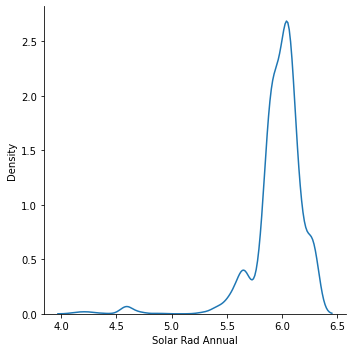

In [ ]:
newdf = df[~df["Solar Rad Annual"].isnull()]
newdf=newdf.drop(index=2122)
sns.displot(newdf["Solar Rad Annual"].astype("float"),kind='kde')

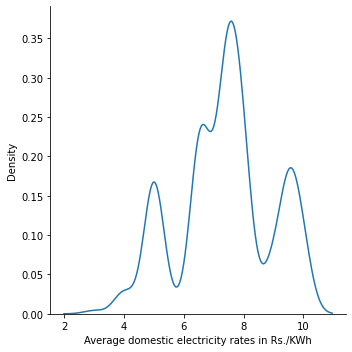

In [ ]:
sns.displot(newdf["Average domestic electricity rates in Rs./KWh"],kind='kde')

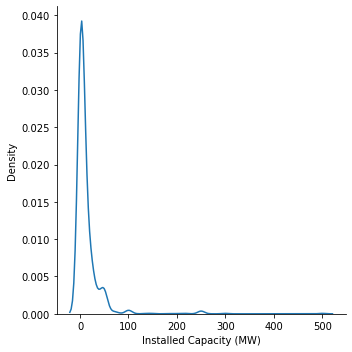

In [ ]:
sns.displot(newdf["Installed Capacity (MW)"],kind='kde')

In [ ]:
from scipy import stats


In [ ]:
def myfun(name,dist_names,newdf,distributions):
  for i in range(len(dist_names)):
    print("The well known distribution against which kstest is performed is"+" "+dist_names[i])
    newdf=newdf[~newdf[name].isnull()]
    args=distributions[i].fit(list(map(float,list(newdf[name]))))
    print(stats.kstest(list(map(float,list(newdf[name]))),dist_names[i],args=args)[1])

In [ ]:
myfun("Installed Capacity (MW)",dist_names,newdf,distributions)
myfun("Average domestic electricity rates in Rs./KWh",dist_names,newdf,distributions)

The well known distribution against which kstest is performed is weibull_min
1.4398746489381983e-31
The well known distribution against which kstest is performed is norm
1.0981351423796417e-206
The well known distribution against which kstest is performed is weibull_max
0.0
The well known distribution against which kstest is performed is invgauss
3.677234300627906e-18
The well known distribution against which kstest is performed is uniform
0.0
The well known distribution against which kstest is performed is gamma
0.0
The well known distribution against which kstest is performed is expon
6.884607670995114e-168
The well known distribution against which kstest is performed is lognorm
3.088617456627587e-17
The well known distribution against which kstest is performed is pearson3
1.22513329114322e-62
The well known distribution against which kstest is performed is triang
0.0
The well known distribution against which kstest is performed is rayleigh
2.295224260487367e-213
The well known distr

[6.08713913, 6.08713913, 5.662205219, 5.984491348, 6.08713913, 6.08713913, 6.005609035, 6.08713913, 6.08713913, 6.08713913, 6.08713913, 5.645240784, 6.08713913, 6.069832325, 5.66189909, 5.645420551, 6.08713913, 6.08713913, 6.08713913, 6.08713913, 6.08713913, 6.08713913, 6.08713913, 6.08713913, 5.66189909, 5.804380417, 5.662205219, 5.640436649, 5.804380417, 5.645240784, 6.08713913, 6.069832325, 6.08713913, 6.069832325, 5.984491348, 6.08713913, 5.616372585, 5.804380417, 5.675191879, 6.08713913, 6.08713913, 6.08713913, 5.984491348, 5.763189316, 6.005609035, 6.08713913, 6.08713913, 6.08713913, 5.984491348, 5.616372585, 5.66189909, 6.005609035, 6.08713913, 6.069832325, 5.984491348, 5.984491348, 6.069832325, 5.984491348, 5.984491348, 6.005609035, 6.069832325, 5.984491348, 5.66189909, 5.616372585, 6.08713913, 6.069832325, 5.624595642, 5.984491348, 5.984491348, 5.984491348, 6.08713913, 5.984491348, 6.08713913, 6.005609035, 5.695436954, 6.08713913, 5.624595642, 6.069832325, 5.984369755, 6.06983

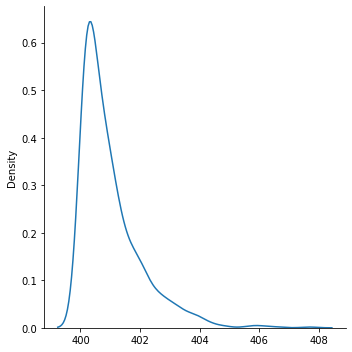

In [ ]:
sns.displot(sample,kind='kde')

In [ ]:
print(stats.kstest(sample,'expon',args=(400.00117718310196, 1.0012504597130487)))

KstestResult(statistic=0.026902877271339054, pvalue=0.46198139804277977)


In [ ]:
for i in range(len(dist_names)):
  args=distributions[i].fit(sample)
  print(stats.kstest(sample,name,args=args))

KstestResult(statistic=0.01902541161155108, pvalue=0.8621086679395122)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.10473514415061197, pvalue=5.265360862994505e-10)
KstestResult(statistic=1.0, pvalue=0.0)


/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:1978: RuntimeWarning: overflow encountered in power
  return -sc.expm1(-pow(x, c))


KstestResult(statistic=0.031077718179933378, pvalue=0.2838783356548505)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.16869649887220395, pvalue=2.397982946440548e-25)
KstestResult(statistic=0.6682153832734137, pvalue=0.0)
KstestResult(statistic=0.632118101944623, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


In [ ]:
distribution = stats.expon

In [ ]:
sample=list(map(float,list(newdf["Installed Capacity (MW)"])))
print(sample)
newdf=newdf[~newdf["Installed Capacity (MW)"].isnull()]
sample=list(map(float,list(newdf["Installed Capacity (MW)"])))
args=distribution.fit(sample)
print(stats.kstest(sample,'expon',args=args))

[1.0, 1.0, 1.0, 1.0, 1.0, 5.0, 5.0, 2.0, 4.0, 5.0, 10.0, 1.15, 3.0, 3.0, 1.0, 1.0, 10.0, 10.0, 50.0, 2.0, 2.0, 1.0, 1.0, 4.0, 2.5, 0.7, 1.0, 1.0, 5.0, 1.0, 2.0, 2.4, 5.4, 3.0, 5.0, 5.0, 1.65, 5.0, 2.0, 6.0, 10.0, 5.0, 39.0, 21.0, 30.0, 5.0, 50.0, 50.0, 70.0, 3.0, 0.39, 10.0, 40.0, 40.0, 10.0, 20.0, 1.0, 20.0, 20.0, 20.0, 25.0, 20.0, 1.0, 0.61, 3.0, 50.0, 1.0, 6.25, 1.0, 2.0, 5.0, 4.0, 5.0, 1.0, 5.43, 4.9, 1.0, 3.0, 3.0, 2.0, 182.0, 0.5, 2.0, 1.0, 68.0, 9.9, 100.0, 1.5, 2.5, 500.0, 5.1, 10.0, 10.0, 2.0, 2.0, 200.0, 50.0, 30.0, 50.0, 30.0, 20.0, 30.0, 30.0, 22.0, 2.0, 3.0, 2.0, 9.9, 50.0, 4.0, 50.0, 50.0, 50.0, 100.0, 1.0, 50.0, 3.0, 21.0, 2.0, 50.0, 250.0, 150.0, 250.0, 250.0, 250.0, 250.0, 1.0, 0.75, 1.0, 2.34, 10.0, 1.03, 5.0, 6.0, 1.0, 10.0, 2.5, 2.21, 1.0, 3.0, 2.5, 2.0, 8.0, 9.0, 1.0, 7.0, 10.0, 1.2, 5.0, 10.0, 10.0, 5.0, 1.0, 2.0, 5.0, 2.0, 1.2, 4.99, 3.0, 5.0, 1.5, 4.4, 1.0, 16.25, 10.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.05, 1.0, 1.0, 1.5, 1.0, 5.0, 10.0, 10.0, 3.0, 

In [ ]:
df

,Name of Plant,Installed Capacity (MW),Type,Location (District),Latitude,Longitude,State,Date of Commissioning,Average domestic electricity rates in Rs./KWh,Per capita electricity consumption in KWh,Solar Rad Monthly,Solar Rad Annual,poa monthly
0,M/s. Sri Power Generation Ltd,1.0,solar,Ananthapuramu,14.68333,77.60000,Andhra Pradesh,14-Jan-2012,9.95,1480,"[6.619419574737549, 7.0275349617004395, 7.0989...",6.08713913,"[205.20201110839844, 196.77098083496094, 220.0..."
1,M/S. Amrit Jal Ventures Pvt Ltd,1.0,solar,Ananthapuramu,14.68333,77.60000,Andhra Pradesh,7-Mar-2012,9.95,1480,"[6.619419574737549, 7.0275349617004395, 7.0989...",6.08713913,"[205.20201110839844, 196.77098083496094, 220.0..."
2,M/s. Kishore Electro Infra Pvt Ltd,1.0,solar,Guntur,16.30000,80.45000,Andhra Pradesh,13-Mar-2012,9.95,1480,"[5.876765727996826, 6.448623180389404, 6.70761...",5.662205219,"[182.1797332763672, 180.5614471435547, 207.936..."
3,M/s. Gajanan Financial Services Pvt\rLtd,1.0,solar,Kurnool,15.82547,78.03012,Andhra Pradesh,14-Mar-2012,9.95,1480,"[6.261613845825195, 6.7980875968933105, 7.0308...",5.984491348,"[194.1100311279297, 190.34645080566406, 217.95..."
4,M/s. Andhra Pradesh Industries\rInfrastructure...,1.0,solar,Ananthapuramu,14.68333,77.60000,Andhra Pradesh,15-Mar-2012,9.95,1480,"[6.619419574737549, 7.0275349617004395, 7.0989...",6.08713913,"[205.20201110839844, 196.77098083496094, 220.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2132,M/s Kiroskar Ferrous\rIndustries Ltd,10.0,Solar,Shiivanana Phutane,27.37128,81.70192,Maharashtra,26-Sep-2018,8.91,1424,NaN,NaN,NaN
2133,Priyadarshani\rPolysacks Ltd,1.0,Solar,Anand Darekar,22.56667,72.93333,Maharashtra,27-Sep-2018,8.91,1424,NaN,NaN,NaN
2134,MSPGCL,2.0,Solar,Chief Engineer (SPGD-\rP),17.44522,78.49606,Maharashtra,24-Aug-2018,8.91,1424,NaN,NaN,NaN
2135,MSPGCL,2.0,Solar,Chief Engineer (SPGD-\rP),17.44522,78.49606,Maharashtra,24-Aug-2018,8.91,1424,NaN,NaN,NaN


## VISUALIZATION :

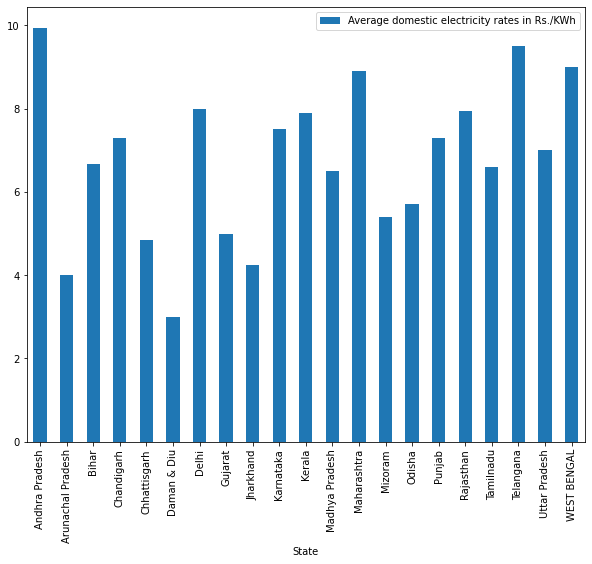

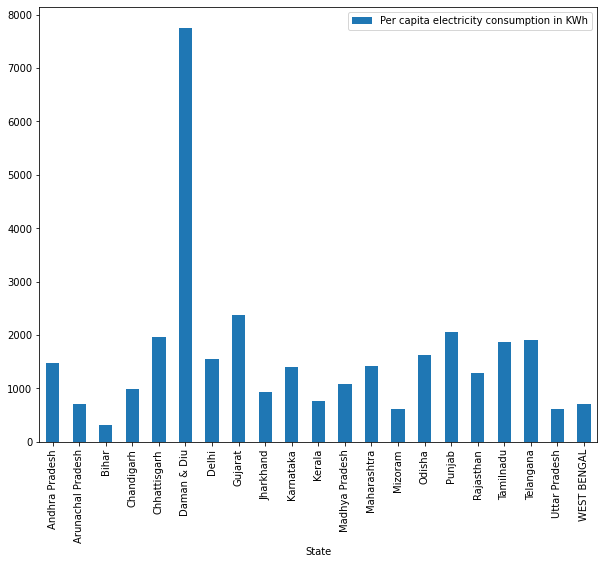

In [ ]:
import matplotlib.pyplot as plt
Data2 = df.groupby(df['State']).mean()
Data3 = Data2[['Average domestic electricity rates in Rs./KWh']]
Data3.plot.bar(rot=0, figsize = (10,8))
plt.xticks(rotation=90, horizontalalignment="center")
plt.show()
Data2 = df.groupby(df['State']).mean()
Data4 = Data2[['Per capita electricity consumption in KWh']]
Data4.plot.bar(rot=0,figsize = (10,8))
plt.xticks(rotation=90, horizontalalignment="center")
plt.show()

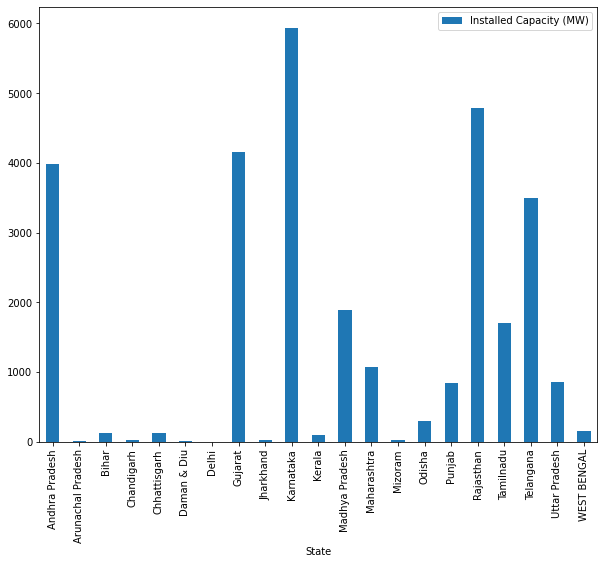

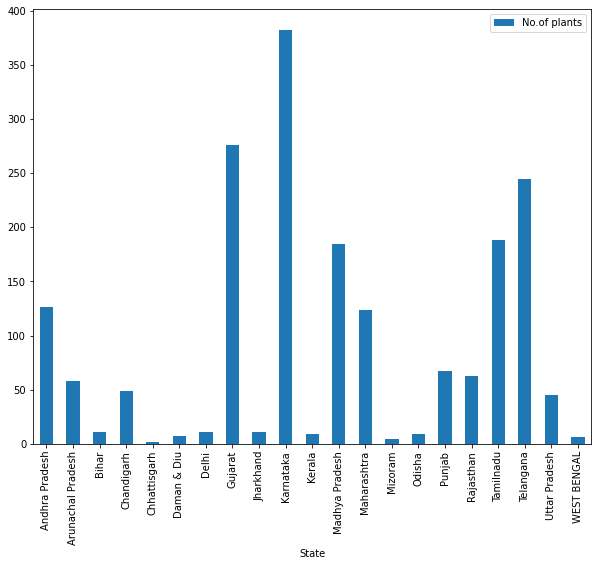

In [ ]:

# df.fillna(0)
df.head()
# df['State']


df1 = df.groupby(df['State']).sum()
col=['Installed Capacity (MW)']
df2 = df1[col]
df2


df3 =df2.drop(['Installed Capacity (MW)'], axis=1)
plants = [126,58,11,49,2,7,11,276,11,383,9,185,124,4,9,67,63,188,245,45,6] 
df3['No.of plants'] = plants
df3

import matplotlib.pyplot as plt
df2.plot.bar(rot=0,figsize=(10,8))
plt.xticks(rotation=90, horizontalalignment = "center")
plt.show()

df3.plot.bar(rot=0,figsize=(10,8))
plt.xticks(rotation=90, horizontalalignment = "center")
plt.show()

In [ ]:
import folium
df2 = df[~df['Latitude'].isnull()]
df2 = df2.groupby(['Location (District)','Latitude','Longitude'])['Installed Capacity (MW)'].sum()
df2 = pd.DataFrame(df2)
df2 = df2.reset_index()
df2.head(10)
df2.columns

n = folium.Map(location=[20.5937, 78.9629], zoom_start=4.5)
for index,row in df2.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius = float(row['Installed Capacity (MW)']/50),
        popup="Capacity : %s"%row['Installed Capacity (MW)'],
        tooltip = row['Location (District)'],
        color="green",
        fill_color="green"
    ).add_to(n)
n

In [ ]:
from numpy import random
sample = random.exponential(size = 1000)
sample = sample +400
print(list(sample))

[400.96859199456816, 400.63127618218215, 400.4340228931547, 400.3264372682303, 400.50621821467035, 400.22454096455675, 401.360448719392, 401.4422351339919, 400.29563421355294, 400.7481182740905, 400.12605804423663, 400.19770775992976, 400.13224968116066, 401.7619410057316, 400.269052224981, 402.0519276725345, 400.225178564272, 401.945903503593, 401.8758888224786, 400.19882881228665, 401.55208488659247, 401.06886599920347, 400.3216613951362, 400.34978423661676, 400.39422389537776, 400.42587276669485, 400.40494171002035, 401.3226847132267, 402.9701527242073, 401.3810272193005, 401.3048429674587, 400.445787583131, 400.04454772615395, 401.7503362146868, 401.7952829282287, 401.9188602451105, 400.03632607297584, 400.0347132654414, 400.1068048099265, 400.89091169872637, 400.45153015925797, 402.2534810221112, 401.48528585345963, 401.04311052626656, 401.38530762899416, 401.1953012661618, 400.88916738364856, 403.94962131105945, 401.5255210344747, 401.55361139303704, 400.4480887749004, 401.402397

In [ ]:
lat = df['Latitude']
lon = df['Longitude']
solarRad = df['Solar Rad Annual']

# print(lat)
# print(lon)
# print(solarRad)
this_map = folium.Map(location=[20.5937, 78.9629], zoom_start=4.5)



newIntSolarRad = []
for i in solarRad:
    if i != '\nnull':
        newIntSolarRad.append(float(i))
    else:
        newIntSolarRad.append(-1)

maxSolarRad = max(newIntSolarRad)



for i in range(len(newIntSolarRad)):
    if newIntSolarRad[i] != -1:
        if i not in [1135, 1136]:
            colors = ['yellow', 'orange', 'red']
            if newIntSolarRad[i] <= 5.7:
                currColor = colors[0]
            elif newIntSolarRad[i] <= 6.0:
                currColor = colors[1]
            else:
                currColor = colors[2]
#             print(i)
#             print([lat[i], lon[i]])
#             print(' ')
            folium.CircleMarker(location=[lat[i], lon[i]], radius=2, weight=10, color=currColor).add_to(this_map)

this_map

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
mydf=pd.read_csv("Dataset2.csv")
mydf

,Name of Plant,Installed Capacity (MW),Type,Location (District),Latitude,Longitude,State,Date of Commissioning,Average domestic electricity rates in Rs./KWh,Per capita electricity consumption in KWh,Solar Rad Monthly,Solar Rad Annual,poa monthly
0,M/s. Sri Power Generation Ltd,1.0,Solar,Ananthapuramu,14.68333,77.60000,Andhra Pradesh,14-Jan-2012,9.95,1480,"[6.619419574737549, 7.0275349617004395, 7.0989...",6.08713913,"[205.20201110839844, 196.77098083496094, 220.0..."
1,M/S. Amrit Jal Ventures Pvt Ltd,1.0,Solar,Ananthapuramu,14.68333,77.60000,Andhra Pradesh,7-Mar-2012,9.95,1480,"[6.619419574737549, 7.0275349617004395, 7.0989...",6.08713913,"[205.20201110839844, 196.77098083496094, 220.0..."
2,M/s. Kishore Electro Infra Pvt Ltd,1.0,Solar,Guntur,16.30000,80.45000,Andhra Pradesh,13-Mar-2012,9.95,1480,"[5.876765727996826, 6.448623180389404, 6.70761...",5.662205219,"[182.1797332763672, 180.5614471435547, 207.936..."
3,M/s. Gajanan Financial Services Pvt\rLtd,1.0,Solar,Kurnool,15.82547,78.03012,Andhra Pradesh,14-Mar-2012,9.95,1480,"[6.261613845825195, 6.7980875968933105, 7.0308...",5.984491348,"[194.1100311279297, 190.34645080566406, 217.95..."
4,M/s. Andhra Pradesh Industries\rInfrastructure...,1.0,Solar,Ananthapuramu,14.68333,77.60000,Andhra Pradesh,15-Mar-2012,9.95,1480,"[6.619419574737549, 7.0275349617004395, 7.0989...",6.08713913,"[205.20201110839844, 196.77098083496094, 220.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2132,M/s Kiroskar Ferrous\rIndustries Ltd,10.0,Solar,Shiivanana Phutane,27.37128,81.70192,Maharashtra,26-Sep-2018,8.91,1424,NaN,NaN,NaN
2133,Priyadarshani\rPolysacks Ltd,1.0,Solar,Anand Darekar,22.56667,72.93333,Maharashtra,27-Sep-2018,8.91,1424,NaN,NaN,NaN
2134,MSPGCL,2.0,Solar,Chief Engineer (SPGD-\rP),17.44522,78.49606,Maharashtra,24-Aug-2018,8.91,1424,NaN,NaN,NaN
2135,MSPGCL,2.0,Solar,Chief Engineer (SPGD-\rP),17.44522,78.49606,Maharashtra,24-Aug-2018,8.91,1424,NaN,NaN,NaN


In [ ]:
print(mydf.columns)

Index(['Name of Plant', 'Installed Capacity (MW)', 'Type',
       'Location (District)', 'Latitude', 'Longitude', 'State',
       'Date of Commissioning',
       'Average domestic electricity rates in Rs./KWh',
       'Per capita electricity consumption in KWh', 'Solar Rad Monthly',
       'Solar Rad Annual', 'poa monthly'],
      dtype='object')


In [ ]:
newdf=mydf.groupby(['Location (District)'],as_index=False).agg({'Installed Capacity (MW)':'sum','Latitude':'mean','Longitude':'mean','Average domestic electricity rates in Rs./KWh':'mean','Per capita electricity consumption in KWh':'mean'})
newdf

,Location (District),Installed Capacity (MW),Latitude,Longitude,Average domestic electricity rates in Rs./KWh,Per capita electricity consumption in KWh
0,Aalo,0.05,28.170120,94.798230,4.00,703.0
1,Abali,0.01,30.458560,78.250090,4.00,703.0
2,Abhay Jain,2.20,13.089550,80.286470,8.91,1424.0
3,Adilabad,228.00,19.666670,78.533330,9.50,1896.0
4,Agar Malwa,58.77,23.825024,76.072969,6.50,1084.0
...,...,...,...,...,...,...
305,mukatsar sahib,2.00,30.297968,74.540631,7.30,2046.0
306,sangrur,2.50,30.246080,75.846860,7.30,2046.0
307,siang,0.01,22.600000,83.050000,4.00,703.0
308,"sodhiaya, zirakpur",1.25,30.658350,76.820920,7.30,2046.0


In [ ]:
mydf[['Solar Rad Monthly','Solar Rad Annual','poa monthly']]= mydf[['Solar Rad Monthly','Solar Rad Annual','poa monthly']].apply(pd.to_numeric)

ValueError: ignored

In [ ]:
newdf["Solar Rad Monthly"]=mydf[mydf["Location (District)"]=="Ananthapuramu"]["Solar Rad Monthly"]
for i,row in newdf.iterrows():
  print(row["Location (District)"])

Aalo
Abali
Abhay Jain
Adilabad
Agar Malwa
Ahmedabad
Ajmer
Akshay Mathur
Allahabad
Alwar
Amit Gupta
Amit Panchalwar
Amreli
Amritsar
Anand
Anand Darekar
Ananthapuramu
Andheri East Mumbai
Aravakurichi
Aravalli
Arupukkottai
Arvind Sharma ,\rKholapur
Ashish Navalakha\rPune
Aurangabad
Avadi, Chennai
BBMB
BHARUCH
Badaun
Bagalkote
Balangir
Banaskantha
Banda
Bandra East Mumbai
Bangalore Rural
Bareilly
Bargarh
Barmer
Barod
Bathinda
Bathinda.
Belagavi
Bellary
Bengaluru\rUrban
Bercha
Bhadla
Bharuch
Bhatinda
Bhavnagar
Bhilwara
Bhopal
Bidar
Bihar
Bikaner
Bolangir
Burail
Chamarajanagar\ra
Chandigarh, Sites
Changlang
Charanka
Chief Engineer (SPGD-\rP)
Chikkaballapura
Chintalapudi
Chitradurga
Chittor
Chittorgarh
Churu
Cihm Chandigarh
Coimbatore
Cuddalore
DAMAN
DAMAN & DIU
DIU
Dadri
Davanagere
Deepak Bansal
Deepak Zade
Deomali
Devbhumi Dwarka
Dewas
Dhanas Lake\rChandigarh
Dhar
Dharwad
Dibang
Dindigul
Dindigul Dist
Durg
Erode
Erode Dist
Fazilka
GCG-11, Chandigarh
GCM-11 Chandigarh
Gadag
Gandhinagar
Ganjb

In [ ]:
newdf

,Location (District),Installed Capacity (MW),Latitude,Longitude,Average domestic electricity rates in Rs./KWh,Per capita electricity consumption in KWh,Solar Rad Monthly
0,Aalo,0.05,28.170120,94.798230,4.00,703.0,"[6.619419574737549, 7.0275349617004395, 7.0989..."
1,Abali,0.01,30.458560,78.250090,4.00,703.0,"[6.619419574737549, 7.0275349617004395, 7.0989..."
2,Abhay Jain,2.20,13.089550,80.286470,8.91,1424.0,NaN
3,Adilabad,228.00,19.666670,78.533330,9.50,1896.0,NaN
4,Agar Malwa,58.77,23.825024,76.072969,6.50,1084.0,"[6.619419574737549, 7.0275349617004395, 7.0989..."
...,...,...,...,...,...,...,...
317,rojhani,2.00,21.908640,75.184450,6.50,1084.0,NaN
318,sangrur,2.50,30.246080,75.846860,7.30,2046.0,NaN
319,siang,0.01,22.600000,83.050000,4.00,703.0,NaN
320,"sodhiaya, zirakpur",1.25,30.658350,76.820920,7.30,2046.0,NaN


In [ ]:
#newdf["Solar Rad Monthly"]=mydf[mydf["Location (District)"]=="Ananthapuramu"]["Solar Rad Monthly"]
SolarRadMonthly=[]
SolarRadAnnual=[]
poamonthly=[]
count=0
for i,row in newdf.iterrows():
  SolarRadMonthly.append(mydf[mydf["Location (District)"]==row["Location (District)"]]["Solar Rad Monthly"].iloc[0])
  SolarRadAnnual.append(mydf[mydf["Location (District)"]==row["Location (District)"]]["Solar Rad Annual"].iloc[0])
  poamonthly.append(mydf[mydf["Location (District)"]==row["Location (District)"]]["poa monthly"].iloc[0])
  count=count+1
print(count)

310


In [ ]:
newdf['Solar Rad Monthly']=SolarRadMonthly
newdf['Solar Rad Annual']=SolarRadAnnual
newdf['poa monthly']=poamonthly
newdf


,Location (District),Installed Capacity (MW),Latitude,Longitude,Average domestic electricity rates in Rs./KWh,Per capita electricity consumption in KWh,Solar Rad Monthly,Solar Rad Annual,poa monthly
0,Aalo,0.05,28.170120,94.798230,4.00,703.0,"[3.999358654022217, 3.6590754985809326, 3.6333...",4.204289436,"[123.98011779785156, 102.45411682128906, 112.6..."
1,Abali,0.01,30.458560,78.250090,4.00,703.0,"[5.87696647644043, 5.861727237701416, 6.584075...",5.881288528,"[182.1859588623047, 164.12835693359375, 204.10..."
2,Abhay Jain,2.20,13.089550,80.286470,8.91,1424.0,NaN,NaN,NaN
3,Adilabad,228.00,19.666670,78.533330,9.50,1896.0,"[6.148787975311279, 6.589134216308594, 6.79743...",5.831581116,"[190.6124267578125, 184.49575805664062, 210.72..."
4,Agar Malwa,58.77,23.825024,76.072969,6.50,1084.0,"[5.8297810554504395, 6.8476409912109375, 7.099...",5.992355824,"[180.72320556640625, 191.73394775390625, 220.0..."
...,...,...,...,...,...,...,...,...,...
305,mukatsar sahib,2.00,30.297968,74.540631,7.30,2046.0,"[4.280056476593018, 5.305939197540283, 6.57693...",5.652767181,"[132.68174743652344, 148.56629943847656, 203.8..."
306,sangrur,2.50,30.246080,75.846860,7.30,2046.0,"[4.1143412590026855, 5.412136077880859, 6.4589...",5.530841351,"[127.5445785522461, 151.53981018066406, 200.22..."
307,siang,0.01,22.600000,83.050000,4.00,703.0,"[5.998735427856445, 6.5158185958862305, 6.8137...",5.672237396,"[185.96080017089844, 182.4429168701172, 211.22..."
308,"sodhiaya, zirakpur",1.25,30.658350,76.820920,7.30,2046.0,"[4.3935980796813965, 5.415832996368408, 6.3008...",5.663244247,"[136.2015380859375, 151.64332580566406, 195.32..."


In [ ]:
newdf = newdf[~newdf["Solar Rad Monthly"].isnull()]

In [ ]:
mydf[(mydf["Latitude"] == 32.994440000000004) & (mydf["Longitude"]==74.34722)]

,Name of Plant,Installed Capacity (MW),Type,Location (District),Latitude,Longitude,State,Date of Commissioning,Average domestic electricity rates in Rs./KWh,Per capita electricity consumption in KWh,Solar Rad Monthly,Solar Rad Annual,poa monthly
369,Enrich Energy Ltd.,0.00,Solar,NaN,32.99444,74.34722,Telangana,NaN,9.50,1896,NaN,NaN,NaN
371,Edayar,1.25,Solar,NaN,32.99444,74.34722,Kerala,NaN,7.90,757,NaN,NaN,NaN
372,Kollengode,1.00,Solar,NaN,32.99444,74.34722,Kerala,NaN,7.90,757,NaN,NaN,NaN
373,Barapole,4.00,Solar,NaN,32.99444,74.34722,Kerala,NaN,7.90,757,NaN,NaN,NaN
374,Pothencode,2.00,Solar,NaN,32.99444,74.34722,Kerala,NaN,7.90,757,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,S.P.V Power Plant at Directorate of Textile,0.04,Solar,NaN,32.99444,74.34722,Arunachal Pradesh,NaN,4.00,703,NaN,NaN,NaN
1672,S.P.V Power Plant at Directorate of Higher\ran...,0.03,Solar,NaN,32.99444,74.34722,Arunachal Pradesh,NaN,4.00,703,NaN,NaN,NaN
1673,S.P.V Power Plant at multi utility building\rU...,0.02,Solar,NaN,32.99444,74.34722,Arunachal Pradesh,NaN,4.00,703,NaN,NaN,NaN
2093,Mayura Steel Pvt Ltd,1.00,Solar,NaN,32.99444,74.34722,Maharashtra,21-Nov-2016,8.91,1424,NaN,NaN,NaN


In [ ]:
newdf.isnull().values.sum()

1

In [ ]:
for i in newdf.columns:
  if newdf[i].isnull().any():
    print(i)

poa monthly


In [ ]:
newdf[newdf["poa monthly"].isnull()]

,Location (District),Installed Capacity (MW),Latitude,Longitude,Average domestic electricity rates in Rs./KWh,Per capita electricity consumption in KWh,Solar Rad Monthly,Solar Rad Annual,poa monthly
21,"Arvind Sharma ,\rKholapur",1.25,26.1387,85.3497,8.91,1424.0,"[4.414313793182373, 5.8361358642578125, 6.6744...",5.381332874,NaN


In [ ]:
newdf=newdf.drop(21)

In [ ]:
newdf[newdf["poa monthly"].isnull()]

,Location (District),Installed Capacity (MW),Latitude,Longitude,Average domestic electricity rates in Rs./KWh,Per capita electricity consumption in KWh,Solar Rad Monthly,Solar Rad Annual,poa monthly


In [ ]:
newdf.to_csv("Dataset-cleaned-groupedbydistricts.csv")

K Means CLustering

In [ ]:
import matplotlib.pyplot as plt
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
poamonthlyavg=[]
for i,row in newdf.iterrows():
  temp=row['poa monthly']
  str1 = temp.replace(']','').replace('[','')
  l = str1.replace('"','').split(",")
  l = list(map(float, l))
  poamonthlyavg.append(Average(l))
newdf['Avg Poa Monthly']=poamonthlyavg

In [ ]:
cols=['Installed Capacity (MW)','Average domestic electricity rates in Rs./KWh','Per capita electricity consumption in KWh','Solar Rad Annual','Avg Poa Monthly']

In [ ]:
temp = newdf['poa monthly'].iloc[0]
str1 = temp.replace(']','').replace('[','')
l = str1.replace('"','').split(",")
l = list(map(float, l))
print(Average(l))

128.00621032714844


In [ ]:
def Average(lst): 
    return sum(lst) / len(lst) 

In [ ]:
newdf[['Avg Poa Monthly','Solar Rad Annual']]=newdf[['Avg Poa Monthly','Solar Rad Annual']].apply(pd.to_numeric)

In [ ]:
newdf.dtypes

Location (District)                               object
Installed Capacity (MW)                          float64
Latitude                                         float64
Longitude                                        float64
Average domestic electricity rates in Rs./KWh    float64
Per capita electricity consumption in KWh        float64
Solar Rad Monthly                                 object
Solar Rad Annual                                 float64
poa monthly                                       object
Avg Poa Monthly                                  float64
dtype: object

In [ ]:
cols2=['Installed Capacity (MW)']
data=newdf[cols]
data.head()

,Installed Capacity (MW),Average domestic electricity rates in Rs./KWh,Per capita electricity consumption in KWh,Solar Rad Annual,Avg Poa Monthly
0,0.05,4.0,703.0,4.204289,128.006210
1,0.01,4.0,703.0,5.881289,178.823427
3,228.00,9.5,1896.0,5.831581,177.183739
4,58.77,6.5,1084.0,5.992356,182.013898
5,10.51,5.0,2378.0,6.023422,183.015671


In [ ]:
X = StandardScaler().fit_transform(data)
X

array([[-0.36966962, -1.96724329, -0.96067677, -4.18302633, -4.17765781],
       [-0.36982372, -1.96724329, -0.96067677,  0.25994567,  0.26850159],
       [ 0.50846828,  1.72758395,  0.46506353,  0.12825291,  0.1250401 ],
       ...,
       [-0.36982372, -1.96724329, -0.96067677, -0.29390575, -0.29847753],
       [-0.36504683,  0.24965306,  0.64432677, -0.31773183, -0.31048917],
       [-0.3489441 ,  2.029888  , -0.03209319, -0.2324418 , -0.23491723]])

In [ ]:
kmeans = KMeans(
        init="random",
        n_clusters=2,
        n_init=10,
        max_iter=300)

In [ ]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=2,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [ ]:
kmeans.labels_

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,
}
# A list holds the SSE values for each k
sse = []
silhouette_scorea=[]
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(X)
  sse.append(kmeans.inertia_)
  score = silhouette_score(X, kmeans.labels_)
  silhouette_scorea.append(score)

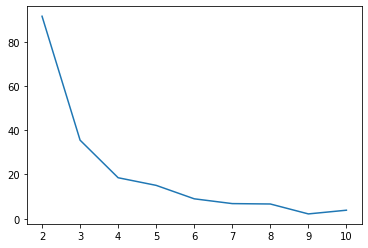

In [ ]:
plt.plot(range(2,11),sse)

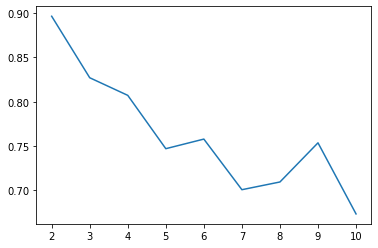

In [ ]:
plt.plot(range(2,11),silhouette_scorea)

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
for i in range(1,30):
  db=DBSCAN(eps=0.5,min_samples=25).fit(X)
  print(len(set(db.labels_)))

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


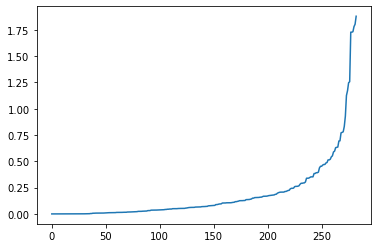

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)